In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Set display options to show all columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [86]:
# Column Summary ¶
# match_date: The date of the match.
# month: The month in which the match took place.
# match_time: The time of the match.
# season: The season of the match.
# location: The location where the match was held.
# matchday_nr: The number of the matchday in the season.
# home_team_name: The name of the home team.
# away_team_name: The name of the away team.
# goals_home: The number of goals scored by the home team.
# goals_away: The number of goals scored by the away team.
# winner: The winner of the match ('home team', 'away team', or 'draw').
# total_goals: The total number of goals scored in the match.

In [87]:
df = pd.read_csv('Ml-Project-Dataset.csv')

In [88]:
df['FINISHED'].value_counts()

FINISHED
True    5508
Name: count, dtype: int64

In [89]:
df.head()
# MATCH_DATE Drop
# Distibution for finished -countplot
# LOCATION - Can convert to State/Country
# MATCHDAY - Explore more
# AWAY_TEAM_ID	AWAY_TEAM_NAME	AWAY_TEAM -> Need to check

,Unnamed: 0,MATCH_DATE,LEAGUE_NAME,SEASON,LEAGUE,FINISHED,LOCATION,VIEWER,MATCHDAY,MATCHDAY_NR,HOME_TEAM_ID,HOME_TEAM_NAME,HOME_TEAM,HOME_ICON,AWAY_TEAM_ID,AWAY_TEAM_NAME,AWAY_TEAM,AWAY_ICON,GOALS_HOME,GOALS_AWAY,DRAW,WIN_HOME,WIN_AWAY
0,0,2005-08-05 20:30:00,1. Fussball-Bundesliga 2005/2006,2005,bl1,True,München,NaN,1. Spieltag,1,40,FC Bayern München,Bayern,https://i.imgur.com/jJEsJrj.png,87,Borussia Mönchengladbach,Gladbach,https://i.imgur.com/KSIk0Eu.png,3,0,0.0,1.0,0.0
1,1,2005-08-06 15:30:00,1. Fussball-Bundesliga 2005/2006,2005,bl1,True,Köln,NaN,1. Spieltag,1,65,1. FC Köln,Köln,https://upload.wikimedia.org/wikipedia/en/thum...,81,1. FSV Mainz 05,Mainz,https://upload.wikimedia.org/wikipedia/commons...,1,0,0.0,1.0,0.0
2,2,2005-08-06 15:30:00,1. Fussball-Bundesliga 2005/2006,2005,bl1,True,Duisburg,NaN,1. Spieltag,1,107,MSV Duisburg,Duisburg,https://upload.wikimedia.org/wikipedia/en/c/c8...,16,VfB Stuttgart,Stuttgart,https://i.imgur.com/v0tkpNx.png,1,1,1.0,0.0,0.0
3,3,2005-08-06 15:30:00,1. Fussball-Bundesliga 2005/2006,2005,bl1,True,Hamburg,NaN,1. Spieltag,1,100,Hamburger SV,HSV,https://upload.wikimedia.org/wikipedia/commons...,79,1. FC Nürnberg,Nürnberg,https://upload.wikimedia.org/wikipedia/commons...,3,0,0.0,1.0,0.0
4,4,2005-08-06 15:30:00,1. Fussball-Bundesliga 2005/2006,2005,bl1,True,Wolfsburg,NaN,1. Spieltag,1,131,VfL Wolfsburg,Wolfsburg,https://i.imgur.com/ucqKV4B.png,7,Borussia Dortmund,BVB,https://upload.wikimedia.org/wikipedia/commons...,2,2,1.0,0.0,0.0


<Axes: xlabel='GOALS_HOME', ylabel='Density'>

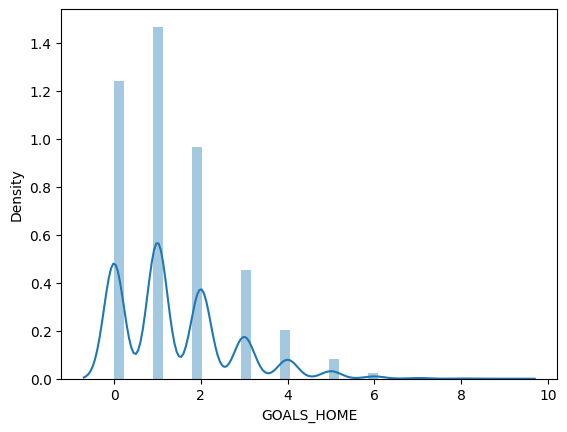

In [90]:
sns.distplot(df['GOALS_HOME'])

<Axes: >

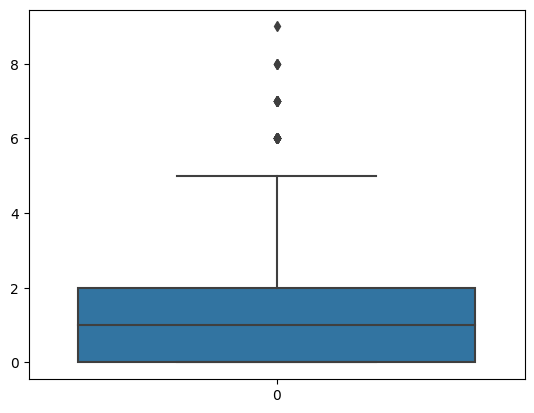

In [91]:
sns.boxplot(df['GOALS_HOME'])

In [92]:
df['GOALS_HOME'].skew()

1.107116741335191

In [93]:
df.isnull().sum()

Unnamed: 0           0
MATCH_DATE           0
LEAGUE_NAME          0
SEASON               0
LEAGUE               0
FINISHED             0
LOCATION             0
VIEWER            3826
MATCHDAY             0
MATCHDAY_NR          0
HOME_TEAM_ID         0
HOME_TEAM_NAME       0
HOME_TEAM            0
HOME_ICON            0
AWAY_TEAM_ID         0
AWAY_TEAM_NAME       0
AWAY_TEAM           34
AWAY_ICON            0
GOALS_HOME           0
GOALS_AWAY           0
DRAW                 0
WIN_HOME             0
WIN_AWAY             0
dtype: int64

In [94]:
# Dropping viewer or replace with the mean as there many missing values

# df.drop(columns=['VIEWER'], inplace=True)

In [95]:
df['LOCATION'].unique()

array(['München', 'Köln', 'Duisburg', 'Hamburg', 'Wolfsburg', 'Bremen',
       'Hannover', 'Gelsenkirchen', 'Frankfurt', 'Leverkusen', 'Gladbach',
       'Dortmund', 'Berlin', 'Kaiserslautern', 'Nürnberg', 'Bielefeld',
       'Stuttgart', 'Mainz', 'Cottbus', 'Aachen', 'Bochum', 'Karlsruhe',
       'Rostock', 'Sinsheim', 'Freiburg', 'Augsburg', 'Fürth',
       'Düsseldorf', 'Braunschweig', 'Paderborn', 'Darmstadt',
       'Ingolstadt', 'Leipzig'], dtype=object)

In [96]:
df.drop(columns=['MATCH_DATE', 'FINISHED', 'HOME_ICON', 'AWAY_ICON', 'LEAGUE_NAME'], inplace=True)

In [97]:
df.drop(columns=['LEAGUE'], inplace=True)

In [98]:
df.shape

(5508, 17)

In [99]:
numerical_columns = df.select_dtypes(include=['number', 'bool']).columns

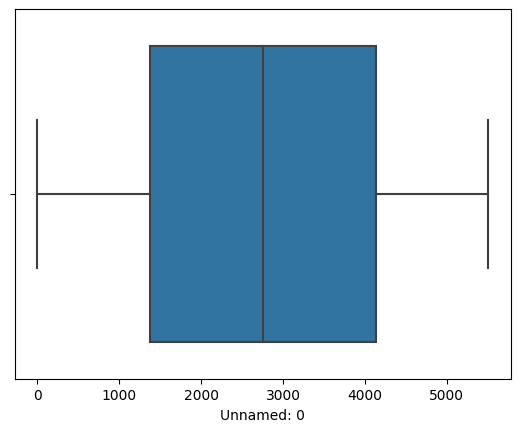

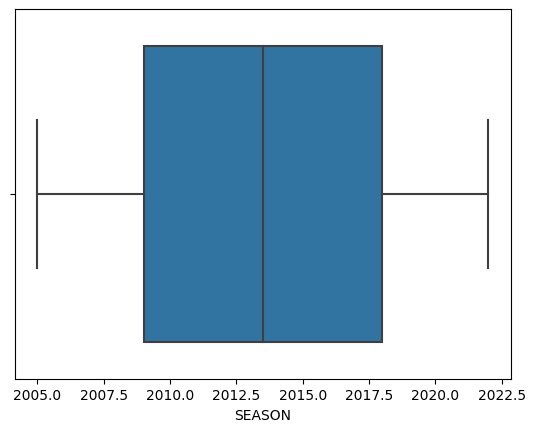

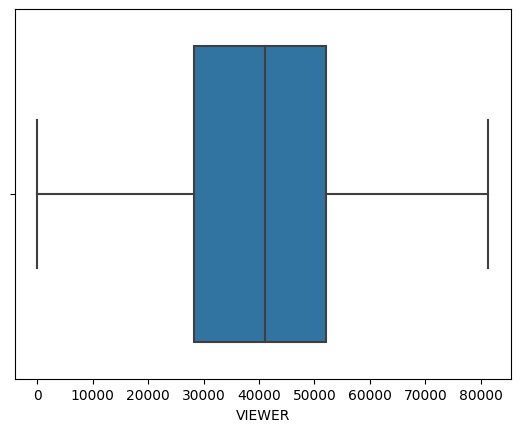

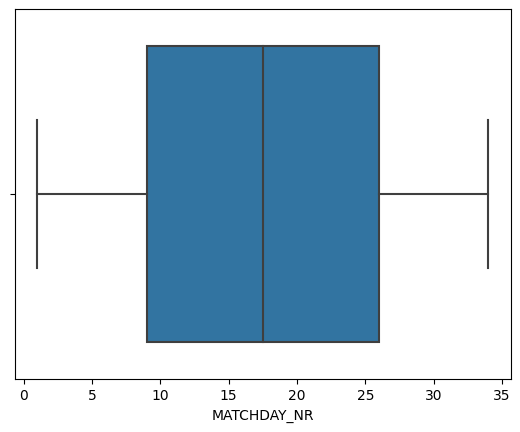

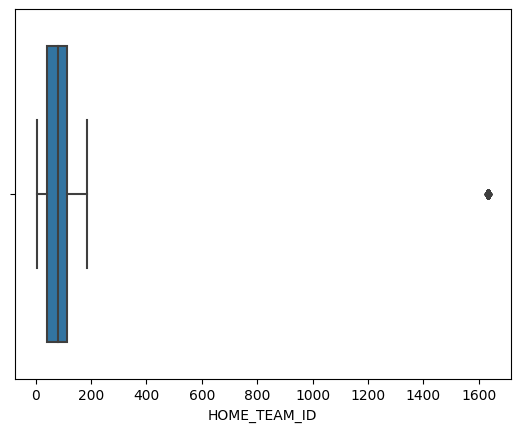

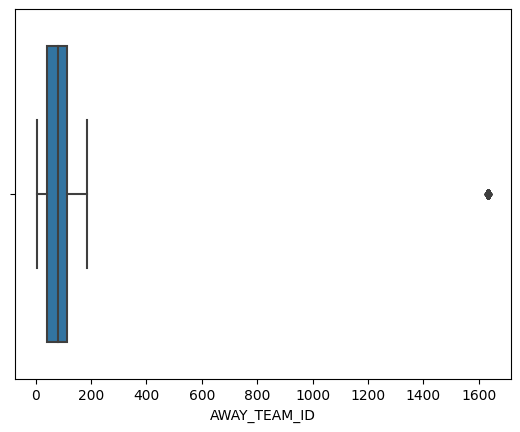

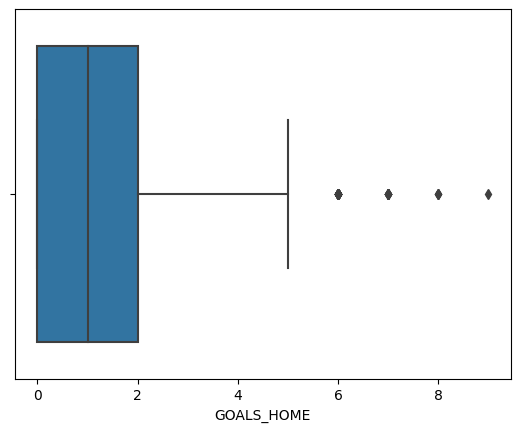

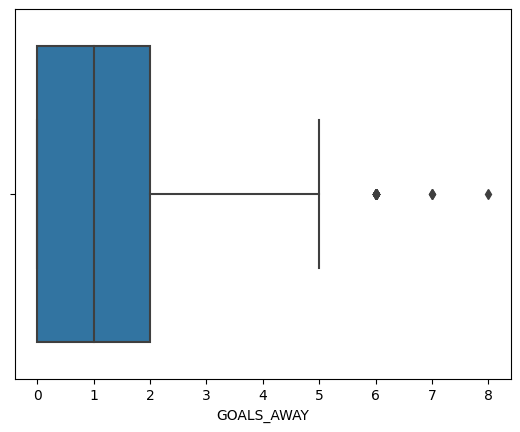

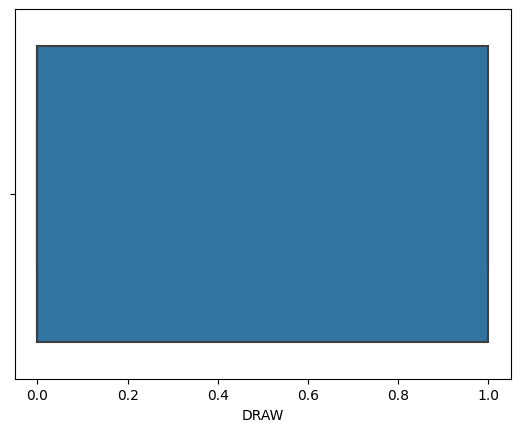

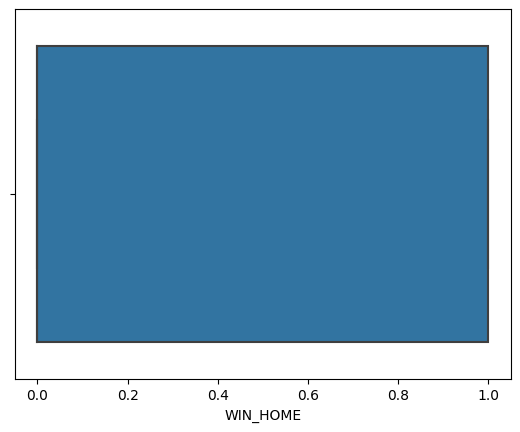

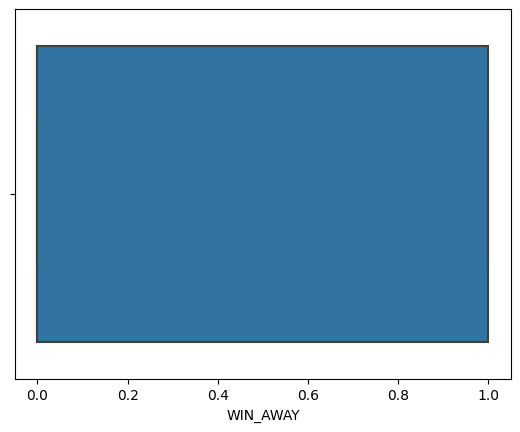

In [100]:
# fig, ax = plt.subplots(1,2, figsize=(8,4))

num_cols = len(numerical_columns)
num_rows = (num_cols + 1) // 2  # Adjust this as needed for your layout preference

for col in numerical_columns:
    sns.boxplot(x=col, data=df)
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


num_plots:: 6
num_rows:: 3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


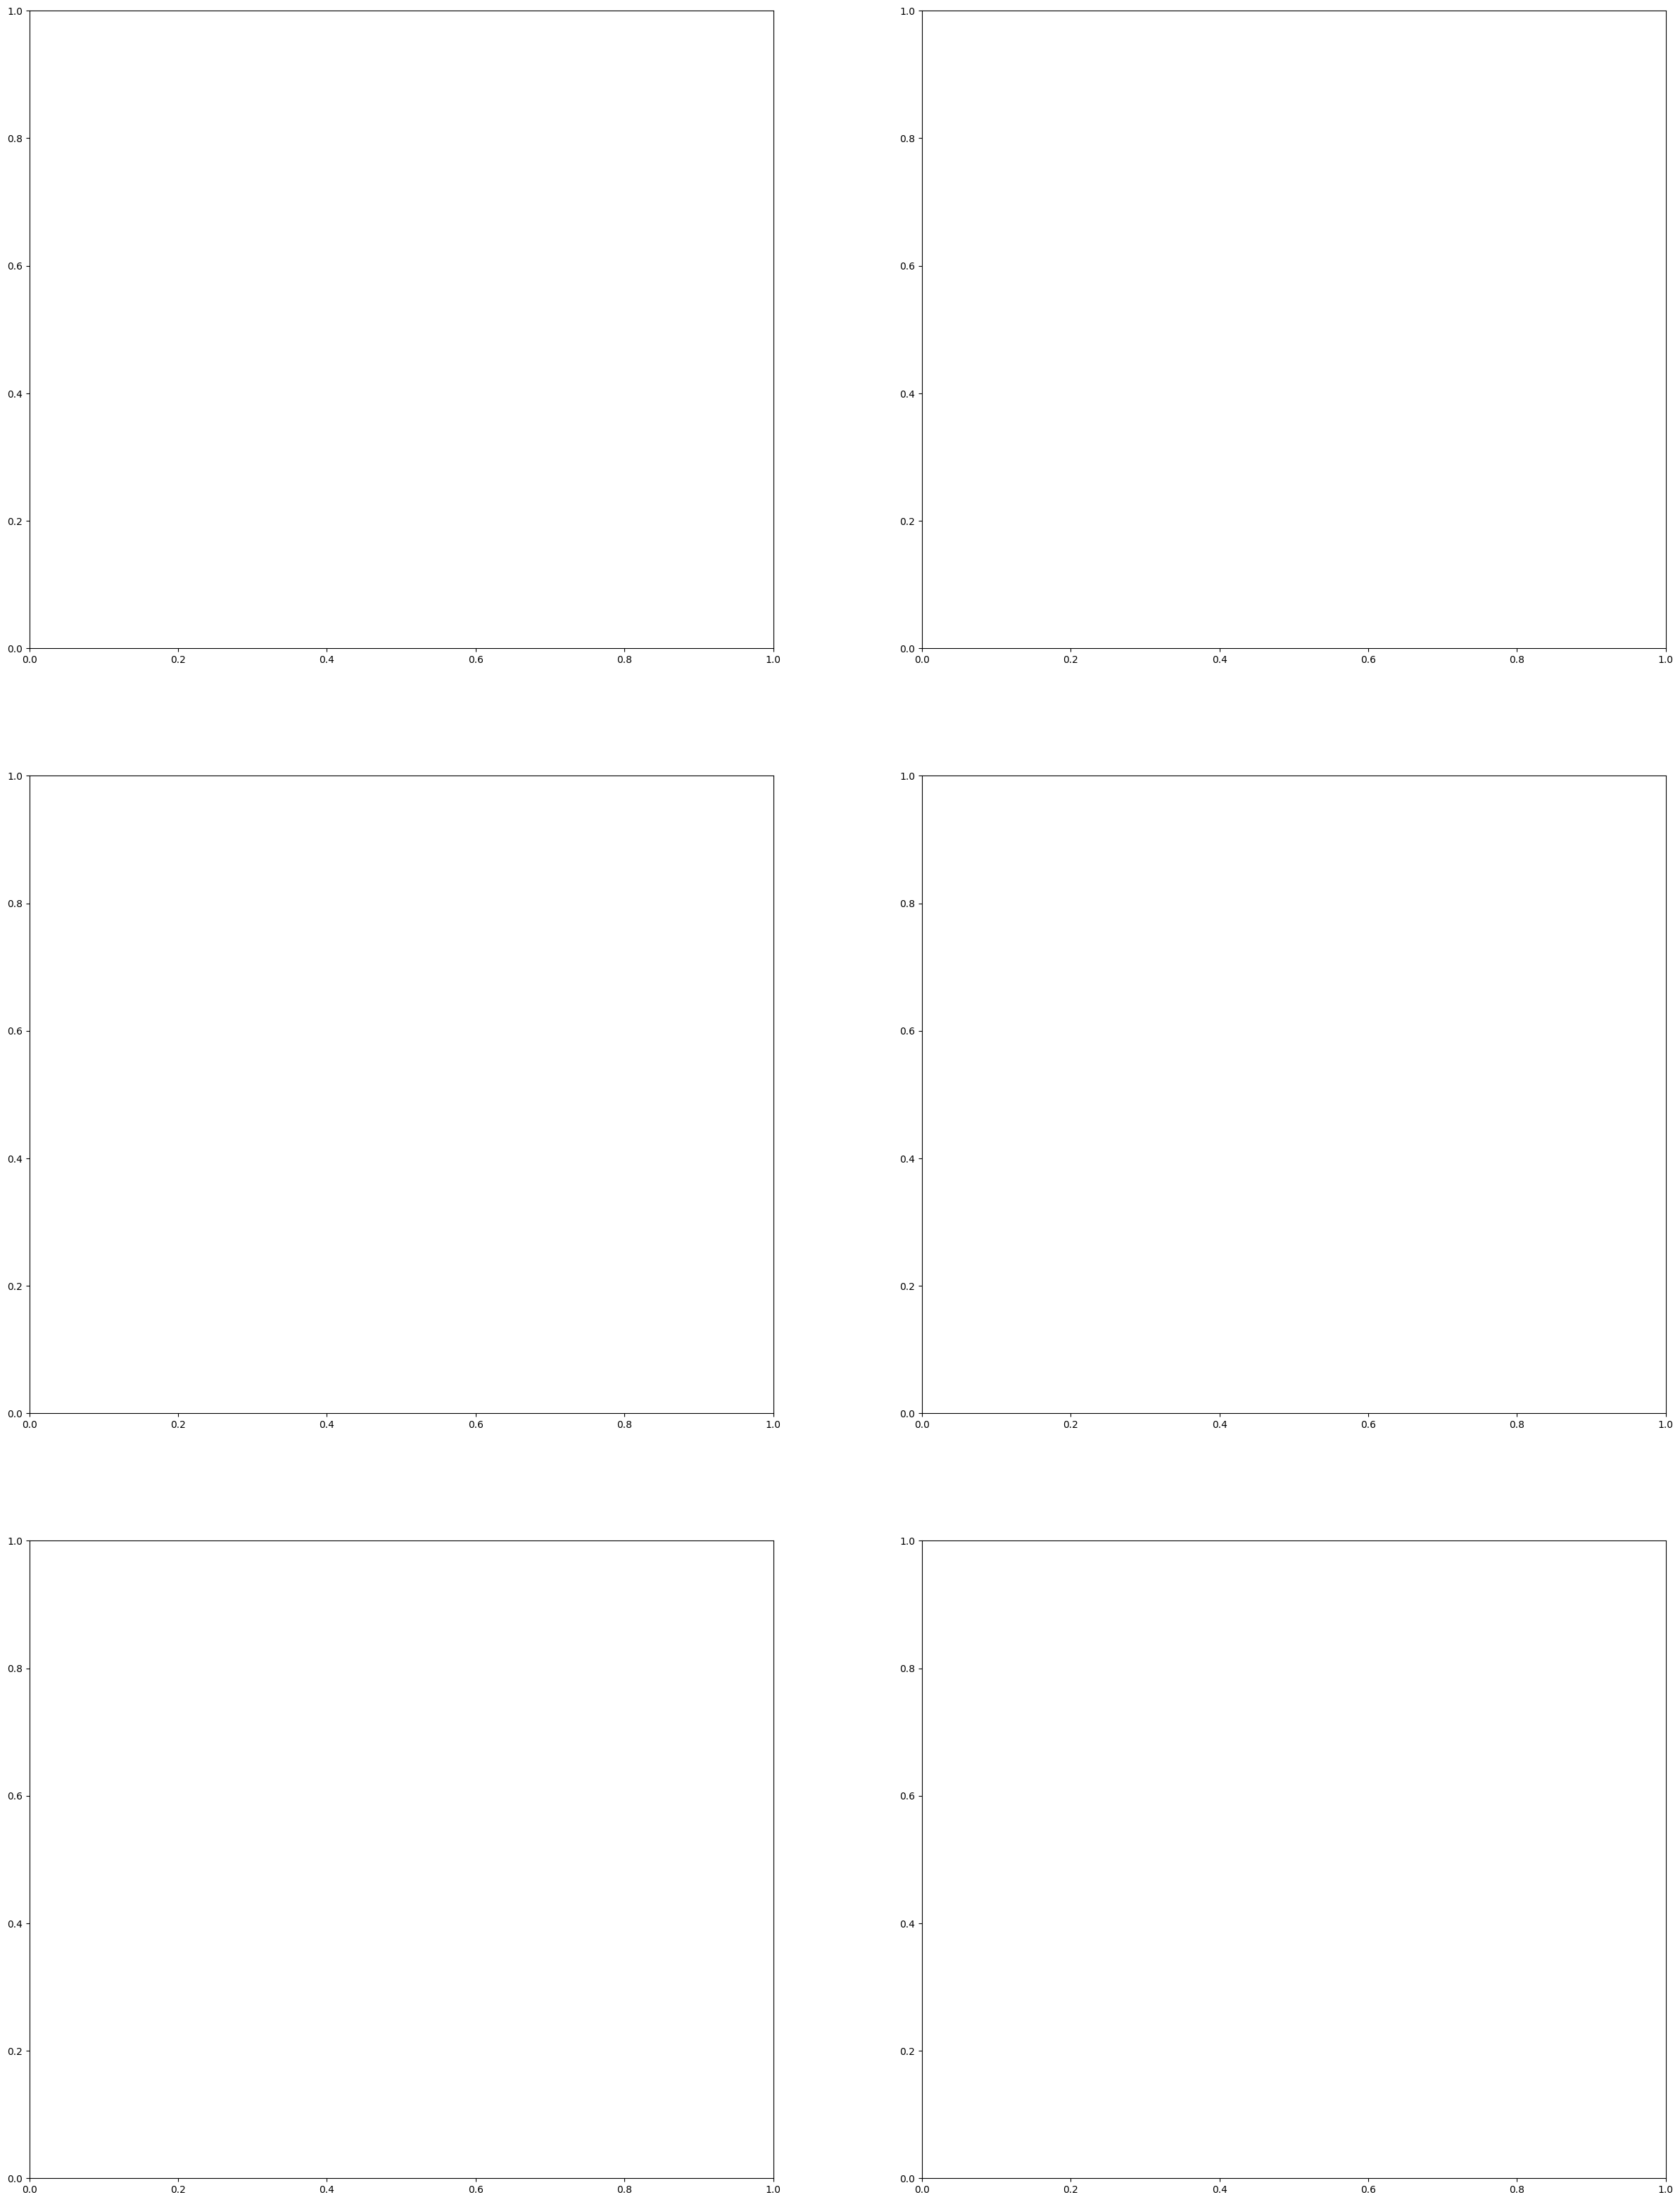

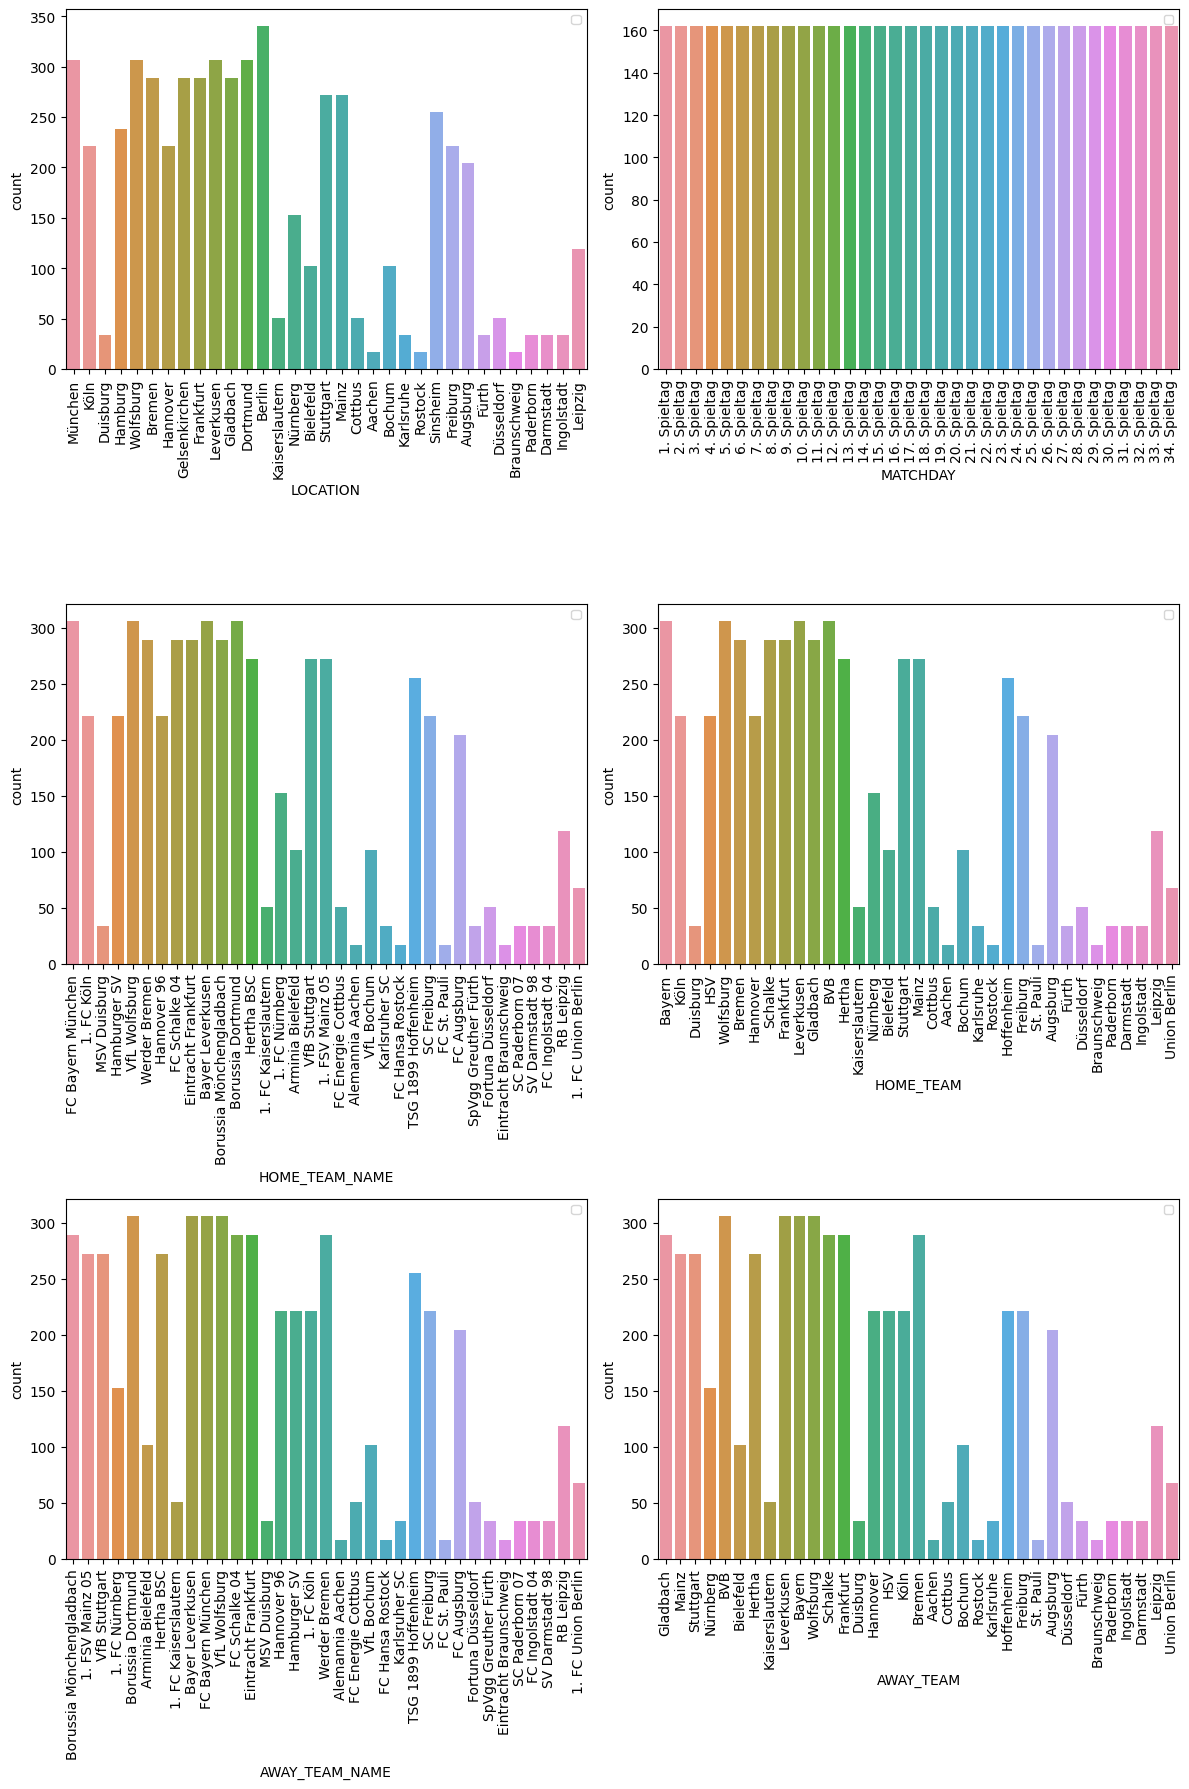

In [101]:
categorical_columns = df.select_dtypes(include=['object']).columns
rows = len(categorical_columns)/2
fig, axes = plt.subplots(3, 2, figsize=(30, 40))

num_plots = len(categorical_columns)
print('num_plots::', num_plots)
num_rows = (num_plots + 1) // 2  # Adjust this as needed for your layout preference
print('num_rows::', num_rows)
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 6))

# Flatten the axes array if it's not a 2D array
axes = axes.flatten()

# Loop through each categorical column and create countplot in subplots
for idx, cat_col in enumerate(categorical_columns):
    row, col = idx // 2, idx % 2
    sns.countplot(x=cat_col, data=df, ax=axes[idx])
    axes[idx].legend(fontsize='small')  # Set the fontsize for the legend
    axes[idx].tick_params(axis='x', rotation=90)

plt.subplots_adjust(hspace=1)

# Remove any empty subplots if the number of categorical columns is odd
if num_plots % 2 != 0:
    fig.delaxes(axes[-1])  # Remove the last subplot

plt.tight_layout()
plt.show()


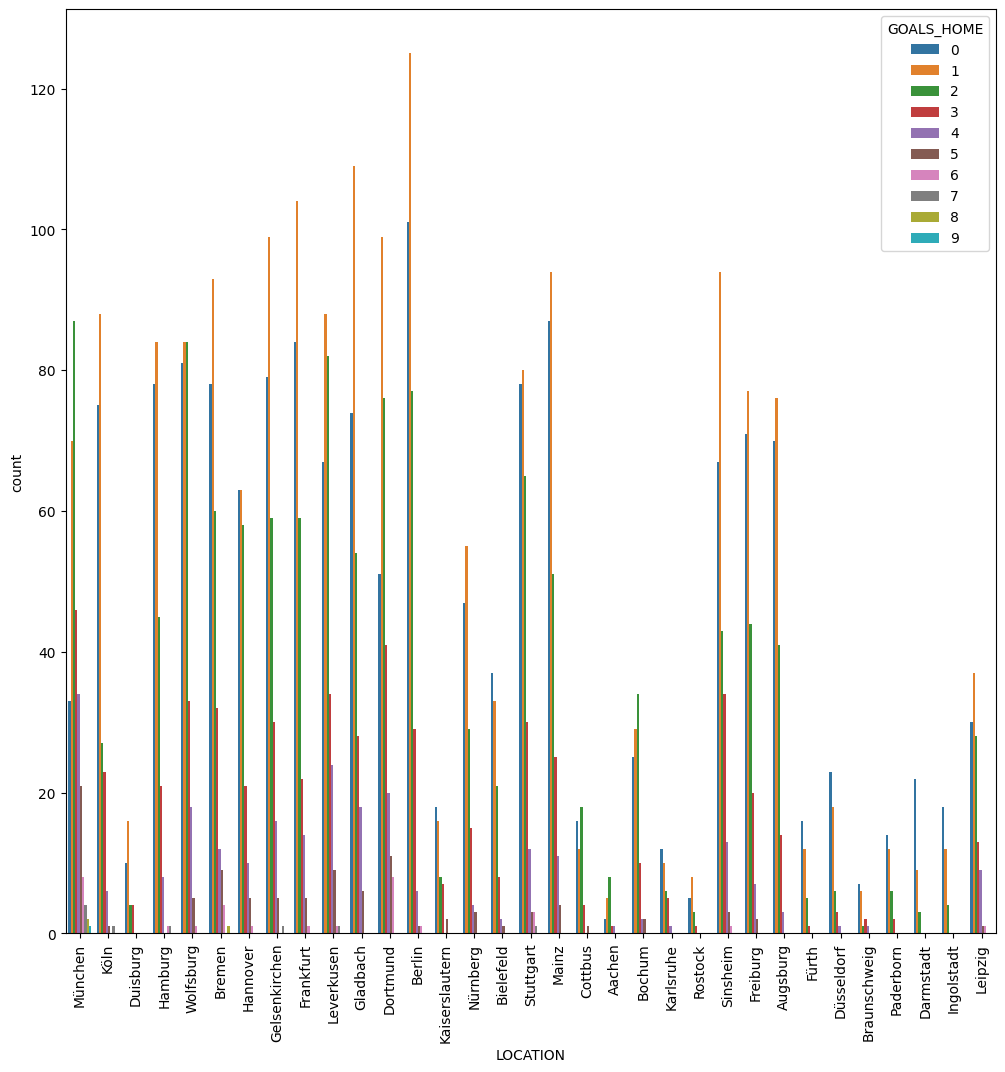

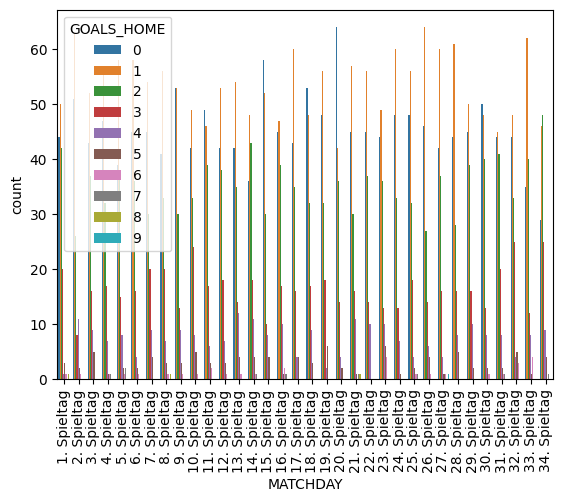

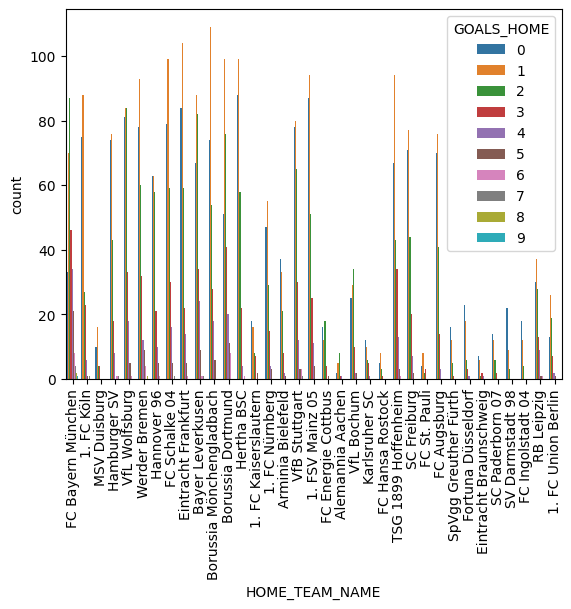

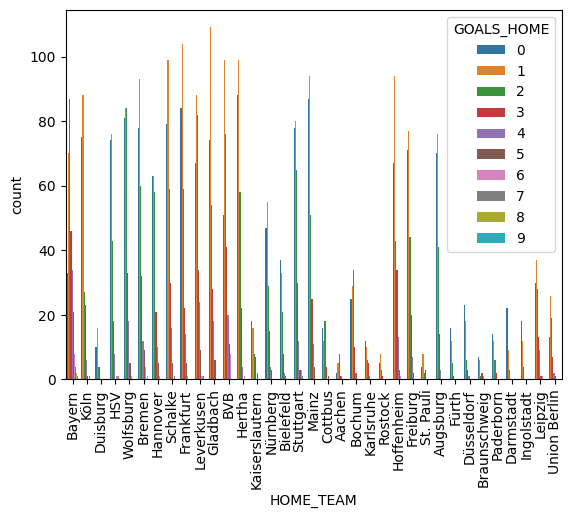

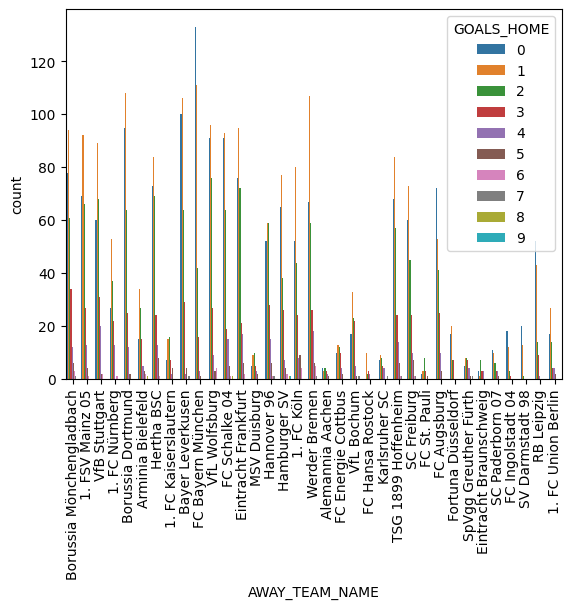

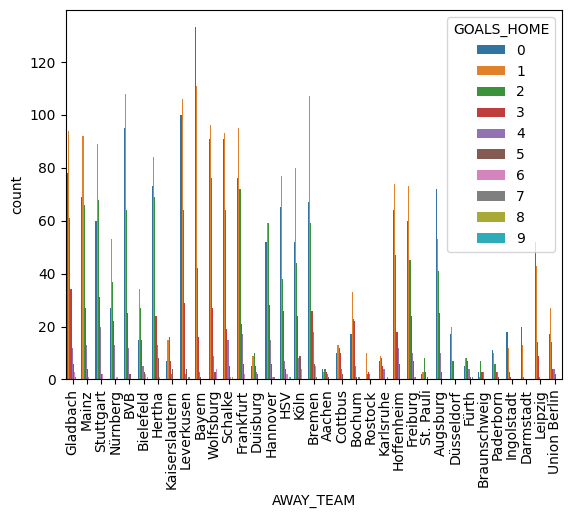

In [102]:
plt.figure(figsize=(12, 12))  
for idx, cat_col in enumerate(categorical_columns):
    sns.countplot(x=cat_col, data=df, hue='GOALS_HOME')
    plt.tick_params(axis='x', rotation=90)

    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


IndexError: index 6 is out of bounds for axis 0 with size 6

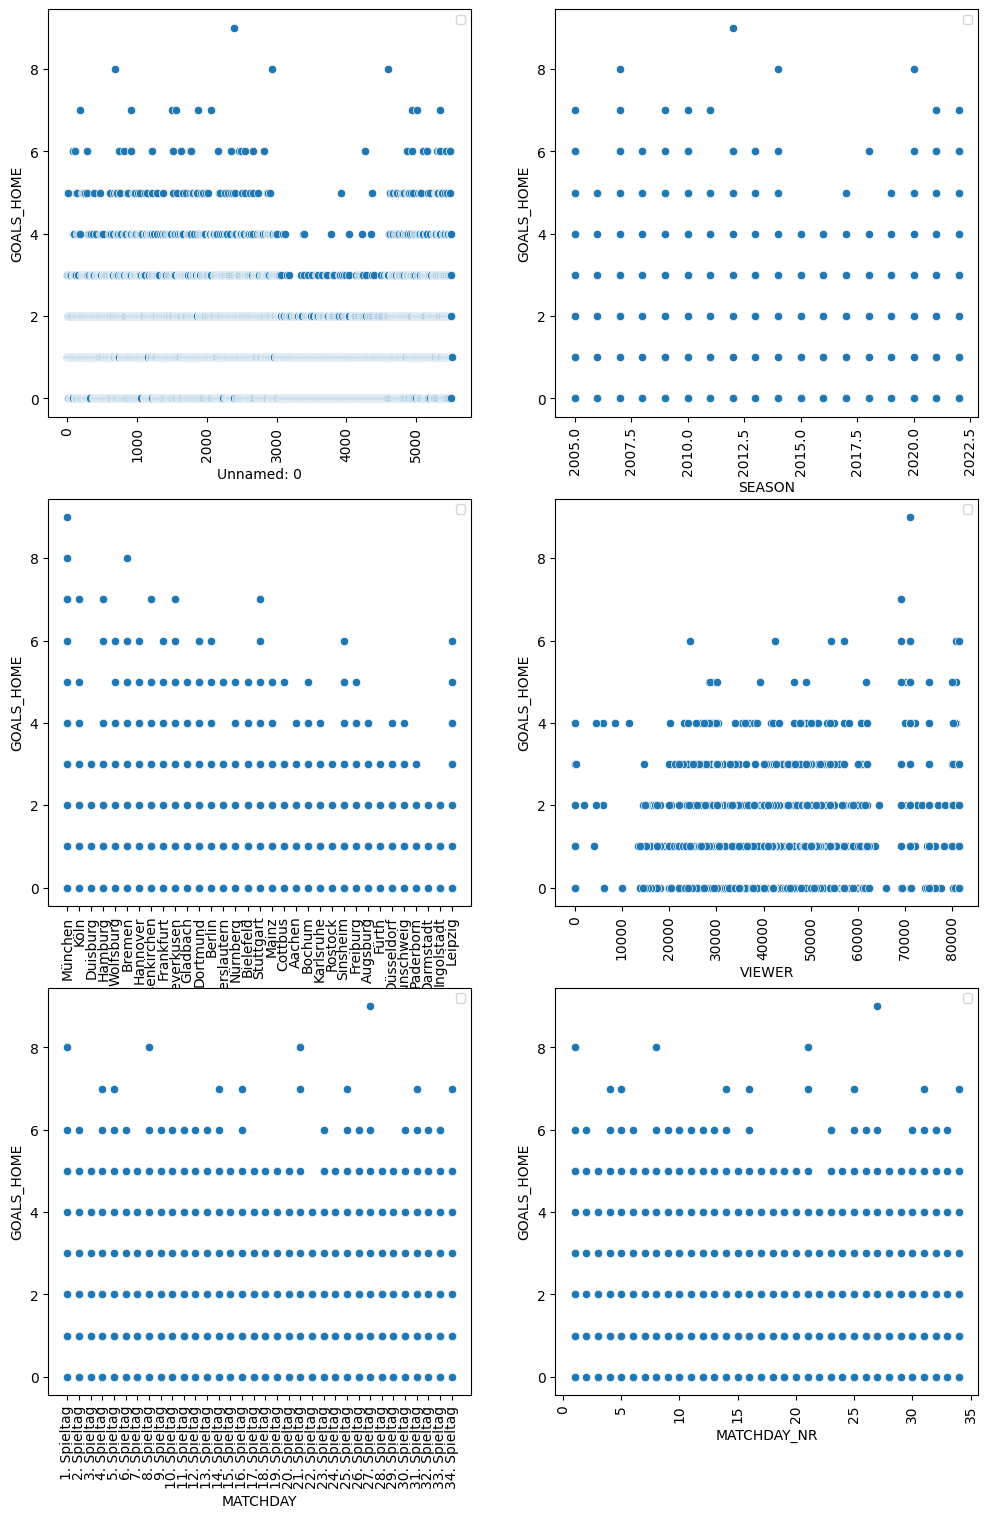

In [103]:
fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 6))

# Flatten the axes array if it's not a 2D array
axes = axes.flatten()

# Loop through each categorical column and create countplot in subplots
for idx, cat_col in enumerate(df.columns):
    row, col = idx // 2, idx % 2
    sns.scatterplot(x=cat_col, y="GOALS_HOME",data=df, ax=axes[idx])
    axes[idx].legend(fontsize='small')  # Set the fontsize for the legend
    axes[idx].tick_params(axis='x', rotation=90)

# plt.subplots_adjust(hspace=1)

# Remove any empty subplots if the number of categorical columns is odd
if num_plots % 2 != 0:
    fig.delaxes(axes[-1])  # Remove the last subplot

plt.tight_layout()
plt.show()

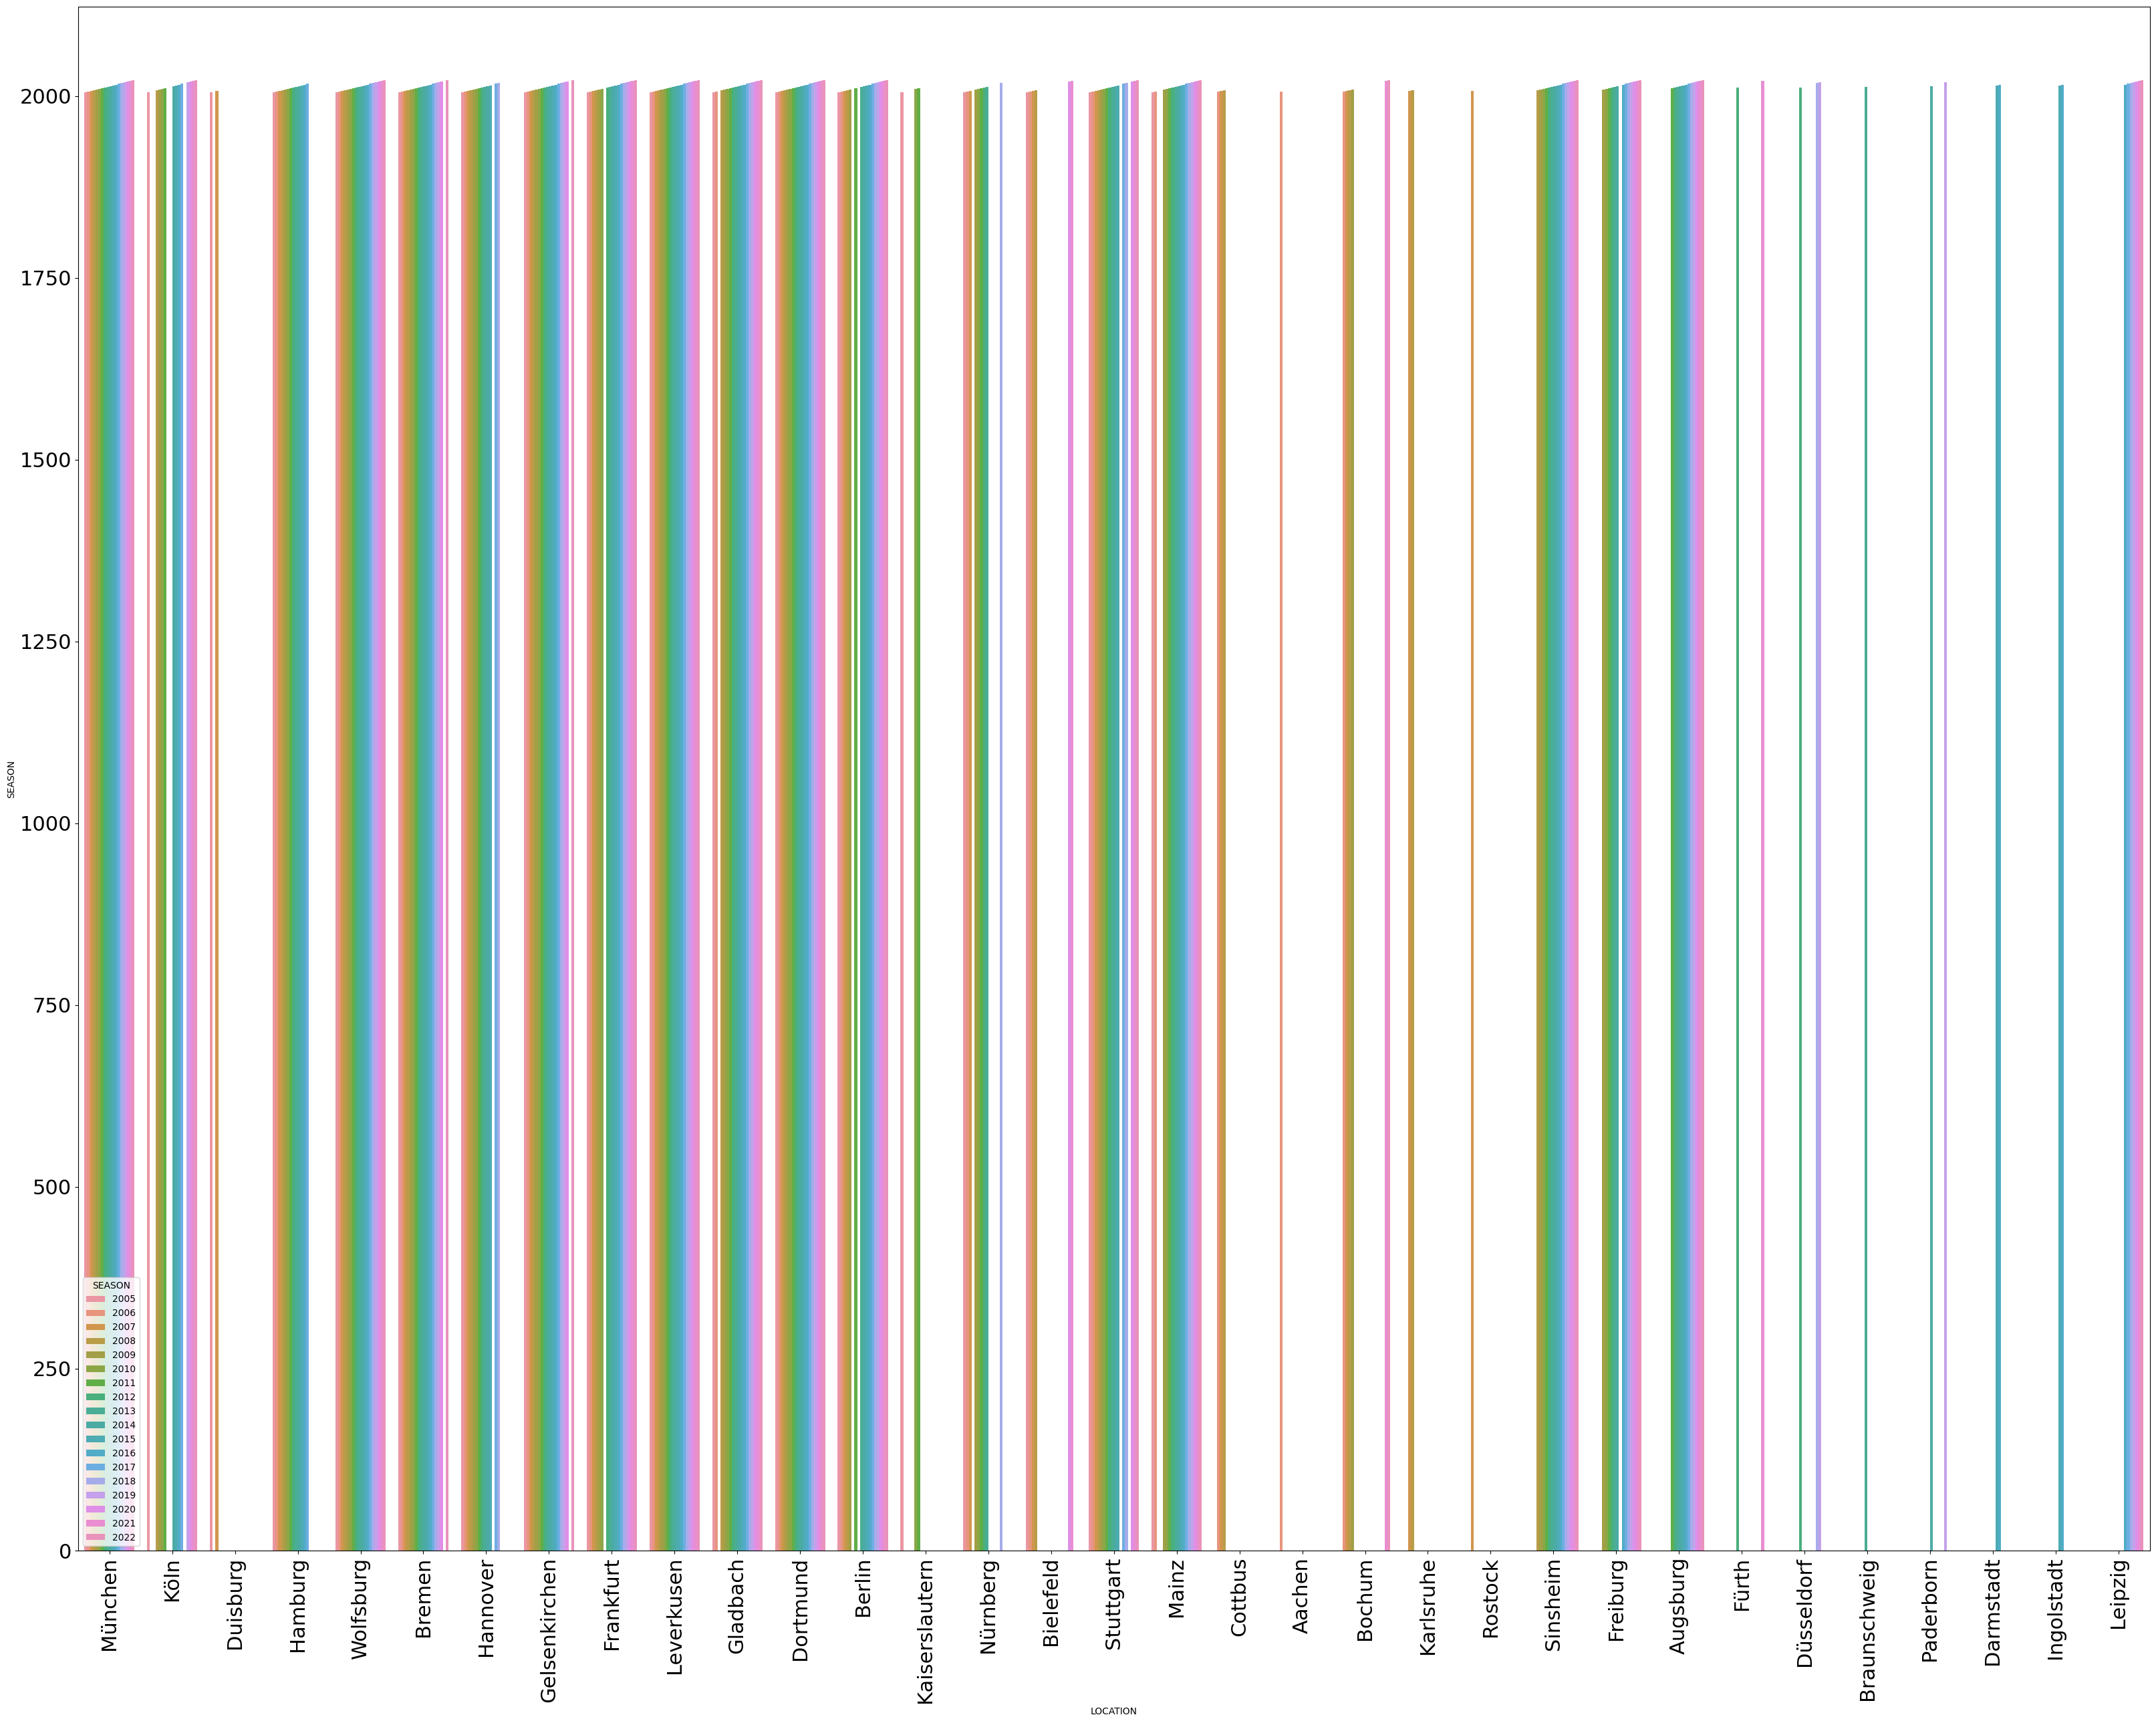

In [104]:
plt.figure(figsize=(40, 30))  
sns.barplot(df, x='LOCATION', y='SEASON', hue='SEASON')
plt.xticks(fontsize=22)  # Adjust fontsize as needed
plt.yticks(fontsize=22)  # Adjust fontsize as needed

# Increase font size of any text annotations or legends
# For Seaborn plots, you can also set font_scale
# sns.set(font_scale=1.2)  # Adjust font_scale as needed

plt.xticks(rotation=90)
plt.show()

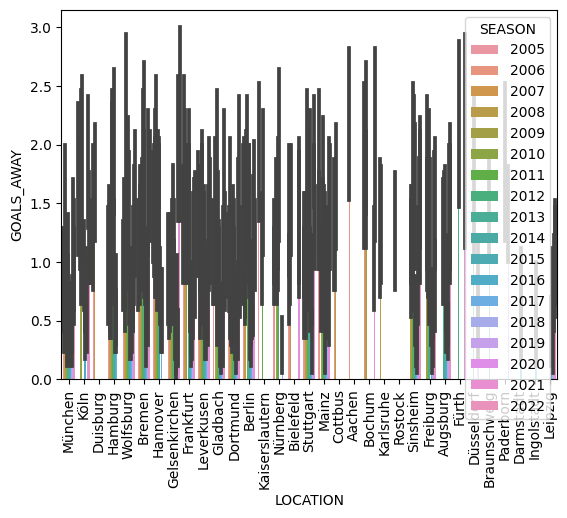

In [108]:
sns.barplot(df, x= 'LOCATION', y = 'GOALS_AWAY', hue='SEASON')

plt.xticks(rotation=90)
plt.show()

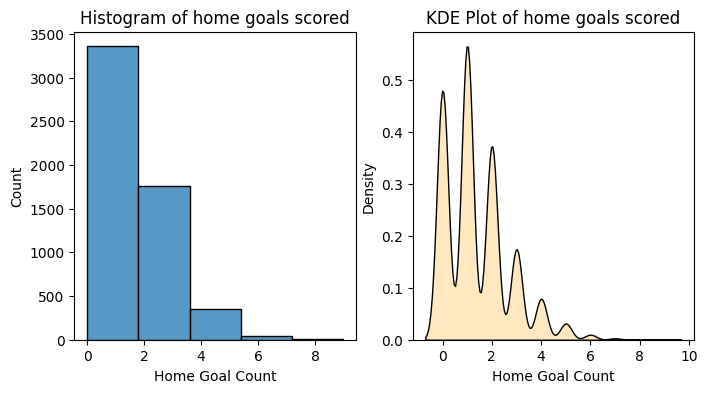

In [110]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0] = sns.histplot(data=df, x='GOALS_HOME', ax=ax[0], bins=5, edgecolor='black')
ax[0].set(title='Histogram of home goals scored', xlabel='Home Goal Count')

ax[1] = sns.kdeplot(data=df, x='GOALS_HOME', ax=ax[1], fill=True, color='orange',edgecolor='black')
ax[1].set(title='KDE Plot of home goals scored', xlabel='Home Goal Count')
plt.show()

In [111]:
df['GOALS_HOME'].skew()

1.107116741335191

In [20]:
# df = df.drop("VIEWER", axis=1)
# df.isnull().sum()

In [112]:
df = df.drop("Unnamed: 0", axis=1)

In [113]:
df['MATCHDAY'].nunique()

34

In [114]:
df.describe(include='all')

,SEASON,LOCATION,VIEWER,MATCHDAY,MATCHDAY_NR,HOME_TEAM_ID,HOME_TEAM_NAME,HOME_TEAM,AWAY_TEAM_ID,AWAY_TEAM_NAME,AWAY_TEAM,GOALS_HOME,GOALS_AWAY,DRAW,WIN_HOME,WIN_AWAY
count,5508.000000,5508,1682.000000,5508,5508.000000,5508.000000,5508,5508,5508.000000,5508,5474,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000
unique,NaN,33,NaN,34,NaN,NaN,35,35,NaN,35,35,NaN,NaN,NaN,NaN,NaN
top,NaN,Berlin,NaN,1. Spieltag,NaN,NaN,FC Bayern München,Bayern,NaN,Bayer Leverkusen,Leverkusen,NaN,NaN,NaN,NaN,NaN
freq,NaN,340,NaN,162,NaN,NaN,306,306,NaN,306,306,NaN,NaN,NaN,NaN,NaN
mean,2013.500000,NaN,41841.023781,NaN,17.500000,109.762346,NaN,NaN,109.762346,NaN,NaN,1.394336,1.075527,0.290668,0.425744,0.283588
std,5.188598,NaN,18057.421146,NaN,9.811599,231.486413,NaN,NaN,231.486413,NaN,NaN,1.299628,1.131180,0.454112,0.494500,0.450780
min,2005.000000,NaN,0.000000,NaN,1.000000,6.000000,NaN,NaN,6.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2009.000000,NaN,28176.250000,NaN,9.000000,40.000000,NaN,NaN,40.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2013.500000,NaN,41000.000000,NaN,17.500000,81.000000,NaN,NaN,81.000000,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2018.000000,NaN,52121.000000,NaN,26.000000,112.000000,NaN,NaN,112.000000,NaN,NaN,2.000000,2.000000,1.000000,1.000000,1.000000


In [115]:
df.describe()

,SEASON,VIEWER,MATCHDAY_NR,HOME_TEAM_ID,AWAY_TEAM_ID,GOALS_HOME,GOALS_AWAY,DRAW,WIN_HOME,WIN_AWAY
count,5508.000000,1682.000000,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000
mean,2013.500000,41841.023781,17.500000,109.762346,109.762346,1.394336,1.075527,0.290668,0.425744,0.283588
std,5.188598,18057.421146,9.811599,231.486413,231.486413,1.299628,1.131180,0.454112,0.494500,0.450780
min,2005.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2009.000000,28176.250000,9.000000,40.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2013.500000,41000.000000,17.500000,81.000000,81.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2018.000000,52121.000000,26.000000,112.000000,112.000000,2.000000,2.000000,1.000000,1.000000,1.000000
max,2022.000000,81365.000000,34.000000,1635.000000,1635.000000,9.000000,8.000000,1.000000,1.000000,1.000000


In [116]:
df["total_goals"] = df['WIN_HOME'] + df['GOALS_HOME']
df.sample(10)

,SEASON,LOCATION,VIEWER,MATCHDAY,MATCHDAY_NR,HOME_TEAM_ID,HOME_TEAM_NAME,HOME_TEAM,AWAY_TEAM_ID,AWAY_TEAM_NAME,AWAY_TEAM,GOALS_HOME,GOALS_AWAY,DRAW,WIN_HOME,WIN_AWAY,total_goals
3373,2016,Berlin,41648.0,1. Spieltag,1,54,Hertha BSC,Hertha,112,SC Freiburg,Freiburg,0,0,1.0,0.0,0.0,0.0
3248,2015,Augsburg,NaN,21. Spieltag,21,95,FC Augsburg,Augsburg,40,FC Bayern München,Bayern,0,1,0.0,0.0,1.0,0.0
847,2007,Berlin,NaN,27. Spieltag,27,54,Hertha BSC,Hertha,134,Werder Bremen,Bremen,1,2,0.0,0.0,1.0,1.0
334,2006,Bremen,NaN,4. Spieltag,4,134,Werder Bremen,Bremen,16,VfB Stuttgart,Stuttgart,2,3,0.0,0.0,1.0,2.0
193,2005,Dortmund,NaN,22. Spieltag,22,7,Borussia Dortmund,BVB,134,Werder Bremen,Bremen,0,1,0.0,0.0,1.0,0.0
5233,2022,Leipzig,NaN,4. Spieltag,4,1635,RB Leipzig,Leipzig,131,VfL Wolfsburg,Wolfsburg,2,0,0.0,1.0,0.0,3.0
1861,2011,Mainz,34034.0,3. Spieltag,3,81,1. FSV Mainz 05,Mainz,9,FC Schalke 04,Schalke,2,4,0.0,0.0,1.0,2.0
4461,2019,Leipzig,42146.0,20. Spieltag,20,1635,RB Leipzig,Leipzig,87,Borussia Mönchengladbach,Gladbach,0,2,0.0,0.0,1.0,0.0
5280,2022,Gladbach,NaN,9. Spieltag,9,87,Borussia Mönchengladbach,Gladbach,65,1. FC Köln,Köln,5,2,0.0,1.0,0.0,6.0
3594,2016,München,75000.0,26. Spieltag,26,40,FC Bayern München,Bayern,95,FC Augsburg,Augsburg,2,0,0.0,1.0,0.0,3.0


In [26]:
# df['MATCH_DATE'].datetime
# df['MATCH_DATE'] = pd.to_datetime(df['MATCH_DATE'])
# df.dtypes

In [27]:
# df['MATCH_DATE'].day()

In [28]:
# # Creating a month column from the match_date column 
# df['month'] = df['MATCH_DATE'].dt.month_name()

# # Seperating the time from the match_date column 
# df['match_time'] = df['MATCH_DATE'].dt.time
# df['match_date'] = df['MATCH_DATE'].dt.date

In [29]:
# df['LEAGUE_NAME'].unique()
# df[['LEAGUE_START_YEAR', 'LEAGUE_END_YEAR']] = df['LEAGUE_NAME'].str.extract(r'(\d{4})/(\d{4})')

# # Display the DataFrame with the extracted years in separate columns
# df.head()

In [30]:
# df['match_date'].head()

In [117]:
print(df.select_dtypes(include=['object']).columns)
for col in df.select_dtypes(include=['object']):
    print("\n", col)
    print(df[col].nunique())

Index(['LOCATION', 'MATCHDAY', 'HOME_TEAM_NAME', 'HOME_TEAM', 'AWAY_TEAM_NAME',
       'AWAY_TEAM'],
      dtype='object')

 LOCATION
33

 MATCHDAY
34

 HOME_TEAM_NAME
35

 HOME_TEAM
35

 AWAY_TEAM_NAME
35

 AWAY_TEAM
35


In [32]:
# df.drop(columns=['LEAGUE_NAME'], inplace=True)
# categorical_value_counts_display(df)

In [118]:
plt.figure(figsize=(20, 15))  
skip_execution = True

if not skip_execution:
    sns.pairplot(data=df, hue='GOALS_HOME')

<Figure size 2000x1500 with 0 Axes>

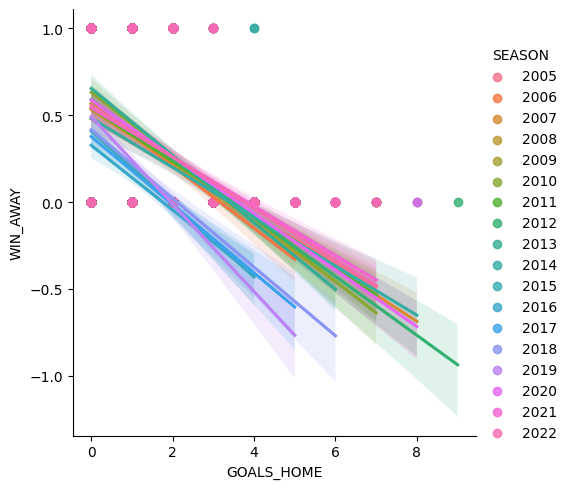

In [119]:
sns.lmplot(x="GOALS_HOME", y="WIN_AWAY", hue="SEASON", data=df);

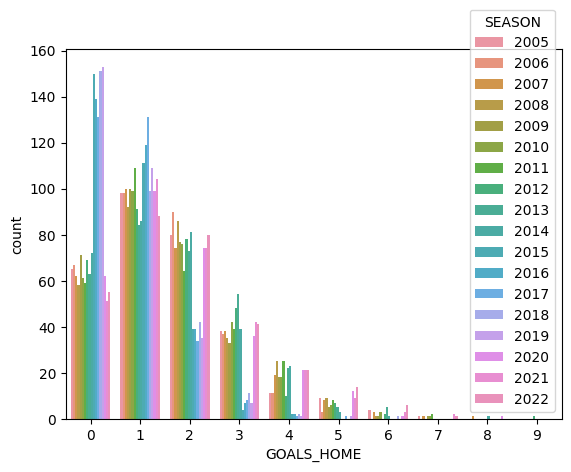

In [38]:
sns.countplot(x="GOALS_HOME", hue="SEASON", data=df);

In [40]:
# sns.countplot(x="GOALS_HOME", y="WIN_AWAY", hue="SEASON", data=df);
# %%script false

# # This cell will be skipped
# print("This cell will be skipped")



Index(['SEASON', 'LOCATION', 'VIEWER', 'MATCHDAY', 'MATCHDAY_NR',
       'HOME_TEAM_ID', 'HOME_TEAM_NAME', 'HOME_TEAM', 'AWAY_TEAM_ID',
       'AWAY_TEAM_NAME', 'AWAY_TEAM', 'GOALS_HOME', 'GOALS_AWAY', 'DRAW',
       'WIN_HOME', 'WIN_AWAY', 'total_goals'],
      dtype='object')


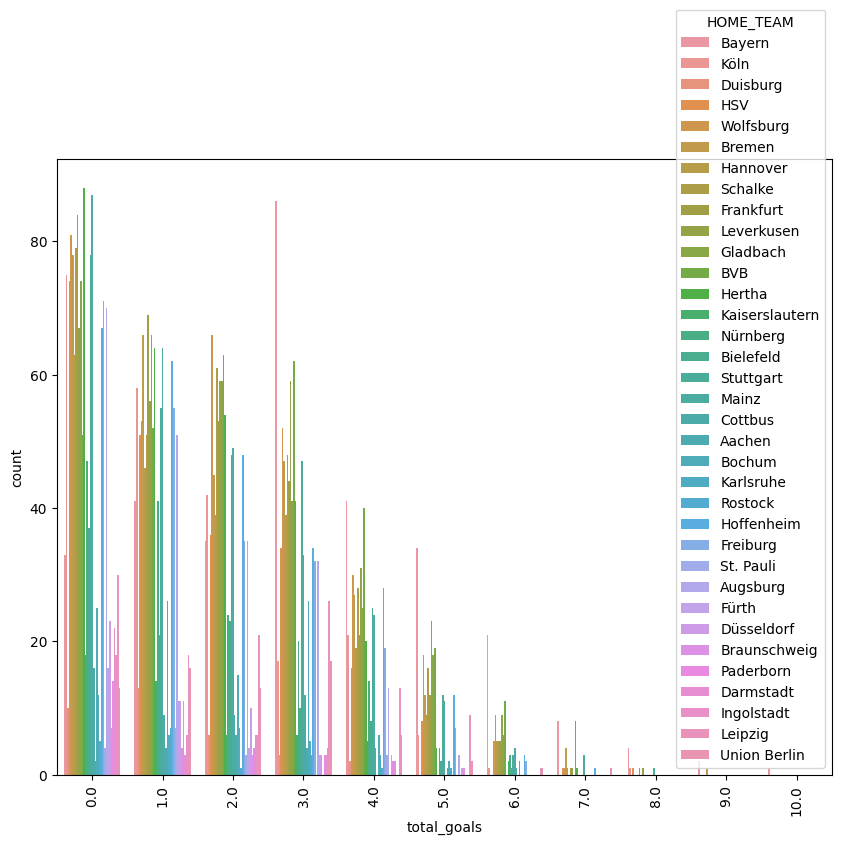

In [41]:
print(df.columns)

# ax = sns.countplot(data=df, x='Survived', hue="Pclass", palette=custom_colors)
plt.figure(figsize=(10, 8))  # Set the size of the figure
sns.countplot(data=df, x="total_goals", hue="HOME_TEAM")

plt.xticks(rotation=90)
plt.show()

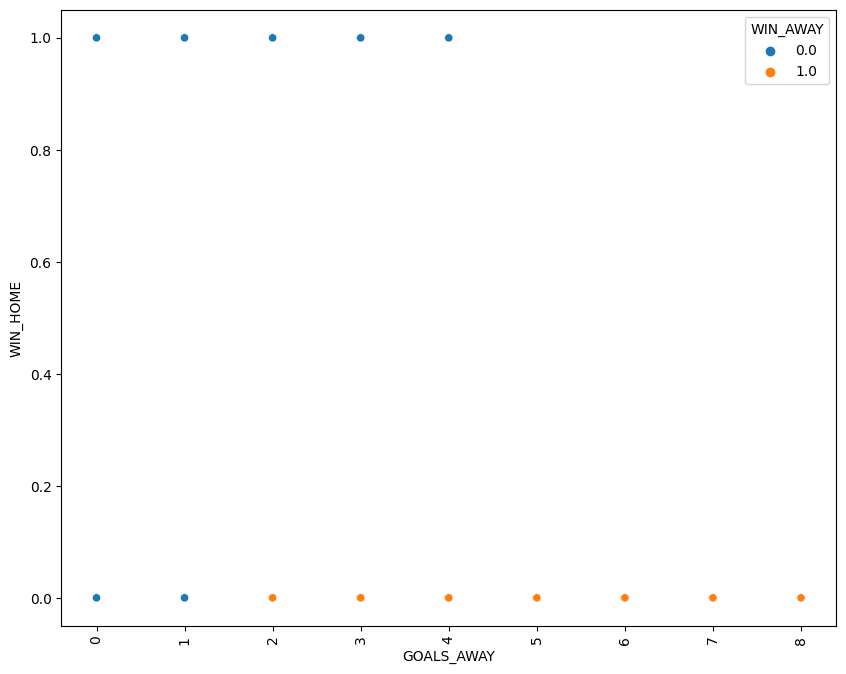

In [120]:
# ax = sns.countplot(data=df, x='Survived', hue="Pclass", palette=custom_colors)

# ['MATCH_DATE', 'SEASON', 'LEAGUE', 'FINISHED', 'LOCATION', 'VIEWER',
#        'MATCHDAY', 'MATCHDAY_NR', 'HOME_TEAM_ID', 'HOME_TEAM_NAME',
#        'HOME_TEAM', 'AWAY_TEAM_ID', 'AWAY_TEAM_NAME', 'AWAY_TEAM',
#        'GOALS_HOME', 'GOALS_AWAY', 'DRAW', 'WIN_HOME', 'WIN_AWAY', 'month',
#        'match_time', 'match_date', 'LEAGUE_START_YEAR', 'LEAGUE_END_YEAR',
#        'total_goals']

plt.figure(figsize=(10, 8))  # Set the size of the figure
# sns.countplot(data=df, x="total_goals", hue="HOME_TEAM")
sns.scatterplot(data=df, x="GOALS_AWAY", y="WIN_HOME", hue="WIN_AWAY")

plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='total_goals', ylabel='count'>

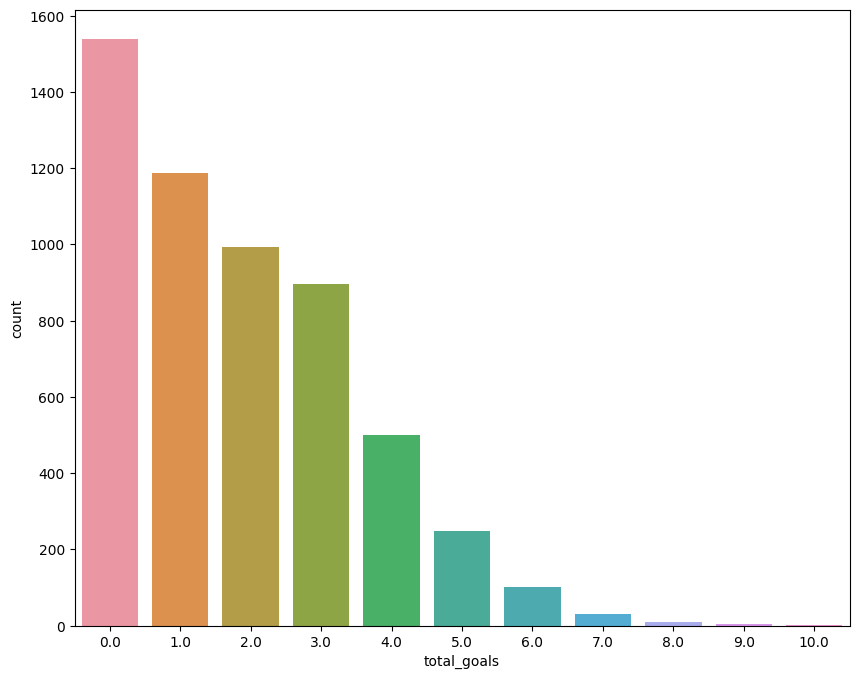

In [43]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x="total_goals")

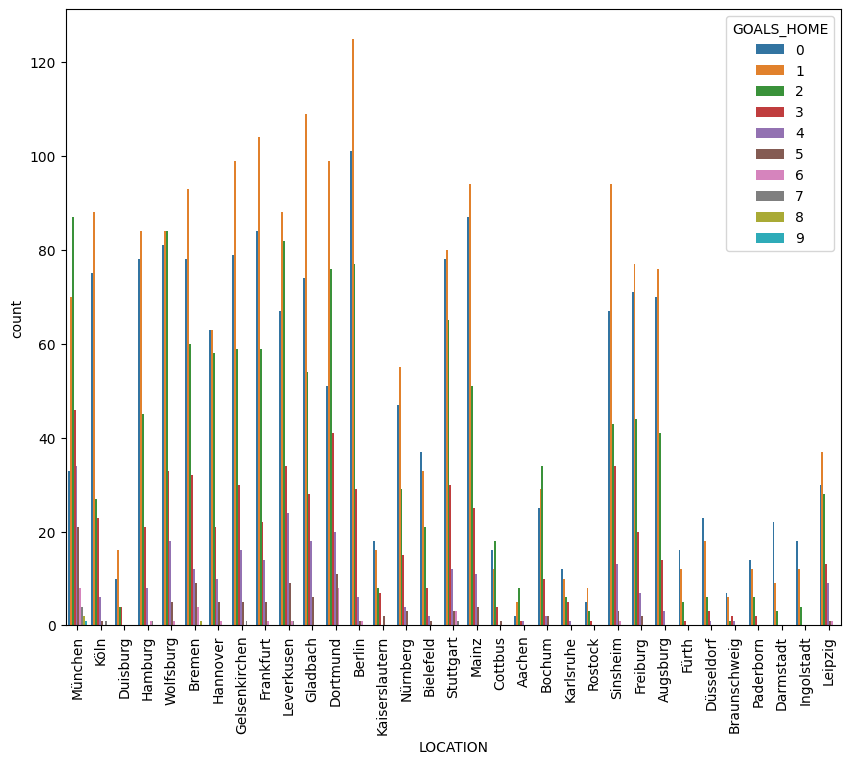

In [121]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x="LOCATION",hue="GOALS_HOME")
plt.xticks(rotation=90)
plt.show()

In [38]:
# plt.figure(figsize=(10, 8))
# sns.countplot(data=df, x='total_goals', hue='', color='blue',palette='deep')


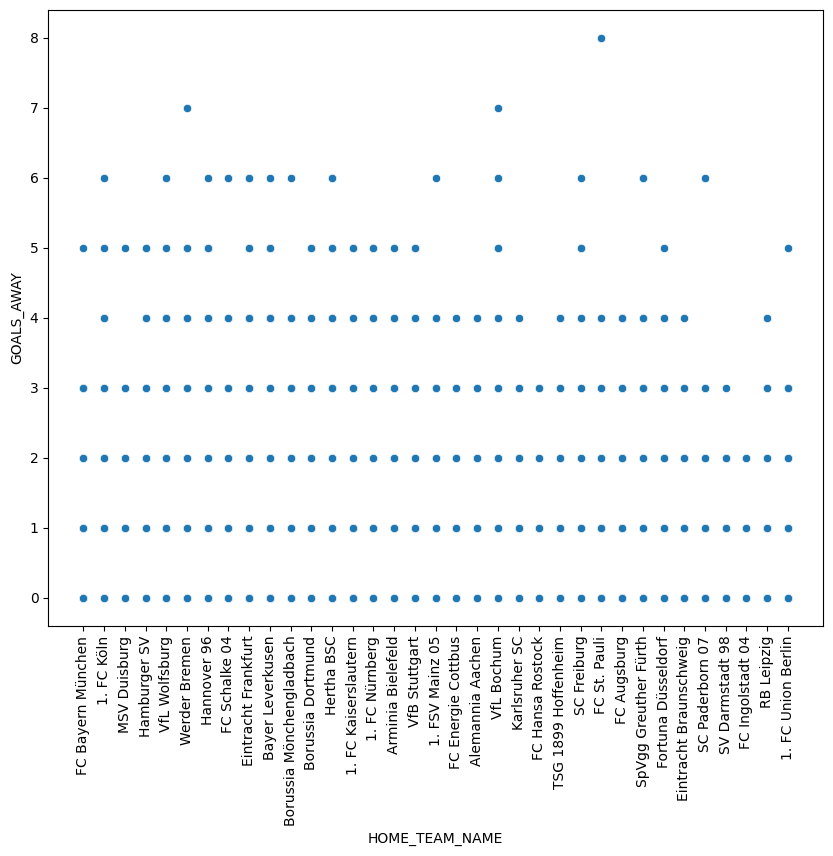

In [122]:
plt.figure(figsize=(10, 8))  # Set the size of the figure

sns.scatterplot(x="HOME_TEAM_NAME", y="GOALS_AWAY", data=df)
plt.xticks(rotation=90)
plt.show()

<Axes: >

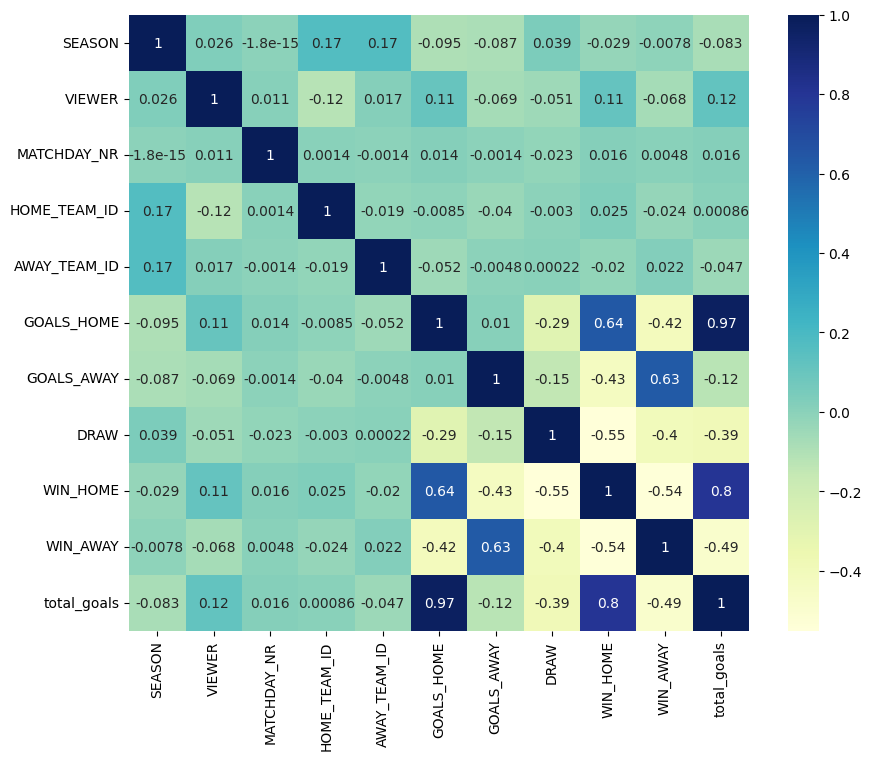

In [123]:
plt.figure(figsize=(10, 8))  # Set the size of the figure

corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='YlGnBu')

In [46]:
df.head()

,SEASON,LOCATION,VIEWER,MATCHDAY,MATCHDAY_NR,HOME_TEAM_ID,HOME_TEAM_NAME,HOME_TEAM,AWAY_TEAM_ID,AWAY_TEAM_NAME,AWAY_TEAM,GOALS_HOME,GOALS_AWAY,DRAW,WIN_HOME,WIN_AWAY,total_goals
0,2005,München,NaN,1. Spieltag,1,40,FC Bayern München,Bayern,87,Borussia Mönchengladbach,Gladbach,3,0,0.0,1.0,0.0,4.0
1,2005,Köln,NaN,1. Spieltag,1,65,1. FC Köln,Köln,81,1. FSV Mainz 05,Mainz,1,0,0.0,1.0,0.0,2.0
2,2005,Duisburg,NaN,1. Spieltag,1,107,MSV Duisburg,Duisburg,16,VfB Stuttgart,Stuttgart,1,1,1.0,0.0,0.0,1.0
3,2005,Hamburg,NaN,1. Spieltag,1,100,Hamburger SV,HSV,79,1. FC Nürnberg,Nürnberg,3,0,0.0,1.0,0.0,4.0
4,2005,Wolfsburg,NaN,1. Spieltag,1,131,VfL Wolfsburg,Wolfsburg,7,Borussia Dortmund,BVB,2,2,1.0,0.0,0.0,2.0


In [124]:
for col in df.columns:
    print('\n======column: ', col)
    print(df[col].value_counts())


======column:  SEASON
SEASON
2005    306
2006    306
2021    306
2020    306
2019    306
2018    306
2017    306
2016    306
2015    306
2014    306
2013    306
2012    306
2011    306
2010    306
2009    306
2008    306
2007    306
2022    306
Name: count, dtype: int64

======column:  LOCATION
LOCATION
Berlin            340
München           306
Wolfsburg         306
Dortmund          306
Leverkusen        306
Gladbach          289
Bremen            289
Gelsenkirchen     289
Frankfurt         289
Mainz             272
Stuttgart         272
Sinsheim          255
Hamburg           238
Hannover          221
Freiburg          221
Köln              221
Augsburg          204
Nürnberg          153
Leipzig           119
Bochum            102
Bielefeld         102
Cottbus            51
Kaiserslautern     51
Düsseldorf         51
Karlsruhe          34
Duisburg           34
Fürth              34
Paderborn          34
Darmstadt          34
Ingolstadt         34
Aachen             17
Braunschweig

In [125]:
df = df.drop(columns=['VIEWER'])

In [48]:
# VIEWER

In [126]:
df = df.drop(columns=['AWAY_TEAM','HOME_TEAM'])

In [127]:
df.head()

,SEASON,LOCATION,MATCHDAY,MATCHDAY_NR,HOME_TEAM_ID,HOME_TEAM_NAME,AWAY_TEAM_ID,AWAY_TEAM_NAME,GOALS_HOME,GOALS_AWAY,DRAW,WIN_HOME,WIN_AWAY,total_goals
0,2005,München,1. Spieltag,1,40,FC Bayern München,87,Borussia Mönchengladbach,3,0,0.0,1.0,0.0,4.0
1,2005,Köln,1. Spieltag,1,65,1. FC Köln,81,1. FSV Mainz 05,1,0,0.0,1.0,0.0,2.0
2,2005,Duisburg,1. Spieltag,1,107,MSV Duisburg,16,VfB Stuttgart,1,1,1.0,0.0,0.0,1.0
3,2005,Hamburg,1. Spieltag,1,100,Hamburger SV,79,1. FC Nürnberg,3,0,0.0,1.0,0.0,4.0
4,2005,Wolfsburg,1. Spieltag,1,131,VfL Wolfsburg,7,Borussia Dortmund,2,2,1.0,0.0,0.0,2.0


In [128]:
df['LOCATION'].unique()

array(['München', 'Köln', 'Duisburg', 'Hamburg', 'Wolfsburg', 'Bremen',
       'Hannover', 'Gelsenkirchen', 'Frankfurt', 'Leverkusen', 'Gladbach',
       'Dortmund', 'Berlin', 'Kaiserslautern', 'Nürnberg', 'Bielefeld',
       'Stuttgart', 'Mainz', 'Cottbus', 'Aachen', 'Bochum', 'Karlsruhe',
       'Rostock', 'Sinsheim', 'Freiburg', 'Augsburg', 'Fürth',
       'Düsseldorf', 'Braunschweig', 'Paderborn', 'Darmstadt',
       'Ingolstadt', 'Leipzig'], dtype=object)

In [129]:
df['MATCHDAY_NR'].value_counts()

MATCHDAY_NR
1     162
26    162
20    162
21    162
22    162
23    162
24    162
25    162
27    162
2     162
28    162
29    162
30    162
31    162
32    162
33    162
19    162
18    162
17    162
16    162
15    162
14    162
13    162
12    162
11    162
10    162
9     162
8     162
7     162
6     162
5     162
4     162
3     162
34    162
Name: count, dtype: int64

In [130]:
cleaned_df = df

In [131]:
categorical_columns = df.select_dtypes(exclude=['number', 'bool']).columns

In [132]:
df['MATCHDAY'] = df['MATCHDAY'].str.extract(r'(\d+)').astype(int)

In [133]:
df['LOCATION'].unique()

array(['München', 'Köln', 'Duisburg', 'Hamburg', 'Wolfsburg', 'Bremen',
       'Hannover', 'Gelsenkirchen', 'Frankfurt', 'Leverkusen', 'Gladbach',
       'Dortmund', 'Berlin', 'Kaiserslautern', 'Nürnberg', 'Bielefeld',
       'Stuttgart', 'Mainz', 'Cottbus', 'Aachen', 'Bochum', 'Karlsruhe',
       'Rostock', 'Sinsheim', 'Freiburg', 'Augsburg', 'Fürth',
       'Düsseldorf', 'Braunschweig', 'Paderborn', 'Darmstadt',
       'Ingolstadt', 'Leipzig'], dtype=object)

In [60]:
# city_to_value = {city: i+1 for i, city in enumerate(df['LOCATION'].unique())}

# # Output the dictionary
# print(city_to_value)

{'München': 1, 'Köln': 2, 'Duisburg': 3, 'Hamburg': 4, 'Wolfsburg': 5, 'Bremen': 6, 'Hannover': 7, 'Gelsenkirchen': 8, 'Frankfurt': 9, 'Leverkusen': 10, 'Gladbach': 11, 'Dortmund': 12, 'Berlin': 13, 'Kaiserslautern': 14, 'Nürnberg': 15, 'Bielefeld': 16, 'Stuttgart': 17, 'Mainz': 18, 'Cottbus': 19, 'Aachen': 20, 'Bochum': 21, 'Karlsruhe': 22, 'Rostock': 23, 'Sinsheim': 24, 'Freiburg': 25, 'Augsburg': 26, 'Fürth': 27, 'Düsseldorf': 28, 'Braunschweig': 29, 'Paderborn': 30, 'Darmstadt': 31, 'Ingolstadt': 32, 'Leipzig': 33}


In [134]:
city_to_state = {
    'München': 'Bavaria',
    'Köln': 'North Rhine-Westphalia',
    'Duisburg': 'North Rhine-Westphalia',
    'Hamburg': 'Hamburg',
    'Wolfsburg': 'Lower Saxony',
    'Bremen': 'Bremen',
    'Hannover': 'Lower Saxony',
    'Gelsenkirchen': 'North Rhine-Westphalia',
    'Frankfurt': 'Hesse',
    'Leverkusen': 'North Rhine-Westphalia',
    'Gladbach': 'North Rhine-Westphalia',
    'Dortmund': 'North Rhine-Westphalia',
    'Berlin': 'Berlin',
    'Kaiserslautern': 'Rhineland-Palatinate',
    'Nürnberg': 'Bavaria',
    'Bielefeld': 'North Rhine-Westphalia',
    'Stuttgart': 'Baden-Württemberg',
    'Mainz': 'Rhineland-Palatinate',
    'Cottbus': 'Brandenburg',
    'Aachen': 'North Rhine-Westphalia',
    'Bochum': 'North Rhine-Westphalia',
    'Karlsruhe': 'Baden-Württemberg',
    'Rostock': 'Mecklenburg-Vorpommern',
    'Sinsheim': 'Baden-Württemberg',
    'Freiburg': 'Baden-Württemberg',
    'Augsburg': 'Bavaria',
    'Fürth': 'Bavaria',
    'Düsseldorf': 'North Rhine-Westphalia',
    'Braunschweig': 'Lower Saxony',
    'Paderborn': 'North Rhine-Westphalia',
    'Darmstadt': 'Hesse',
    'Ingolstadt': 'Bavaria',
    'Leipzig': 'Saxony'
}
df['LOCATION'] = df['LOCATION'].map(city_to_state)

In [61]:
# df['LOCATION'] = df['LOCATION'].map(city_to_value)

In [136]:
df['LOCATION'].nunique()

12

In [135]:
df.head(2)

,SEASON,LOCATION,MATCHDAY,MATCHDAY_NR,HOME_TEAM_ID,HOME_TEAM_NAME,AWAY_TEAM_ID,AWAY_TEAM_NAME,GOALS_HOME,GOALS_AWAY,DRAW,WIN_HOME,WIN_AWAY,total_goals
0,2005,Bavaria,1,1,40,FC Bayern München,87,Borussia Mönchengladbach,3,0,0.0,1.0,0.0,4.0
1,2005,North Rhine-Westphalia,1,1,65,1. FC Köln,81,1. FSV Mainz 05,1,0,0.0,1.0,0.0,2.0


In [137]:
categorical_columns = df.select_dtypes(exclude=['number', 'bool']).columns
categorical_columns

Index(['LOCATION', 'HOME_TEAM_NAME', 'AWAY_TEAM_NAME'], dtype='object')

In [138]:
cleaned_df = pd.get_dummies(df, columns=categorical_columns)

In [139]:
cleaned_df.head(2)

,SEASON,MATCHDAY,MATCHDAY_NR,HOME_TEAM_ID,AWAY_TEAM_ID,GOALS_HOME,GOALS_AWAY,DRAW,WIN_HOME,WIN_AWAY,total_goals,LOCATION_Baden-Württemberg,LOCATION_Bavaria,LOCATION_Berlin,LOCATION_Brandenburg,LOCATION_Bremen,LOCATION_Hamburg,LOCATION_Hesse,LOCATION_Lower Saxony,LOCATION_Mecklenburg-Vorpommern,LOCATION_North Rhine-Westphalia,LOCATION_Rhineland-Palatinate,LOCATION_Saxony,HOME_TEAM_NAME_1. FC Kaiserslautern,HOME_TEAM_NAME_1. FC Köln,HOME_TEAM_NAME_1. FC Nürnberg,HOME_TEAM_NAME_1. FC Union Berlin,HOME_TEAM_NAME_1. FSV Mainz 05,HOME_TEAM_NAME_Alemannia Aachen,HOME_TEAM_NAME_Arminia Bielefeld,HOME_TEAM_NAME_Bayer Leverkusen,HOME_TEAM_NAME_Borussia Dortmund,HOME_TEAM_NAME_Borussia Mönchengladbach,HOME_TEAM_NAME_Eintracht Braunschweig,HOME_TEAM_NAME_Eintracht Frankfurt,HOME_TEAM_NAME_FC Augsburg,HOME_TEAM_NAME_FC Bayern München,HOME_TEAM_NAME_FC Energie Cottbus,HOME_TEAM_NAME_FC Hansa Rostock,HOME_TEAM_NAME_FC Ingolstadt 04,HOME_TEAM_NAME_FC Schalke 04,HOME_TEAM_NAME_FC St. Pauli,HOME_TEAM_NAME_Fortuna Düsseldorf,HOME_TEAM_NAME_Hamburger SV,HOME_TEAM_NAME_Hannover 96,HOME_TEAM_NAME_Hertha BSC,HOME_TEAM_NAME_Karlsruher SC,HOME_TEAM_NAME_MSV Duisburg,HOME_TEAM_NAME_RB Leipzig,HOME_TEAM_NAME_SC Freiburg,HOME_TEAM_NAME_SC Paderborn 07,HOME_TEAM_NAME_SV Darmstadt 98,HOME_TEAM_NAME_SpVgg Greuther Fürth,HOME_TEAM_NAME_TSG 1899 Hoffenheim,HOME_TEAM_NAME_VfB Stuttgart,HOME_TEAM_NAME_VfL Bochum,HOME_TEAM_NAME_VfL Wolfsburg,HOME_TEAM_NAME_Werder Bremen,AWAY_TEAM_NAME_1. FC Kaiserslautern,AWAY_TEAM_NAME_1. FC Köln,AWAY_TEAM_NAME_1. FC Nürnberg,AWAY_TEAM_NAME_1. FC Union Berlin,AWAY_TEAM_NAME_1. FSV Mainz 05,AWAY_TEAM_NAME_Alemannia Aachen,AWAY_TEAM_NAME_Arminia Bielefeld,AWAY_TEAM_NAME_Bayer Leverkusen,AWAY_TEAM_NAME_Borussia Dortmund,AWAY_TEAM_NAME_Borussia Mönchengladbach,AWAY_TEAM_NAME_Eintracht Braunschweig,AWAY_TEAM_NAME_Eintracht Frankfurt,AWAY_TEAM_NAME_FC Augsburg,AWAY_TEAM_NAME_FC Bayern München,AWAY_TEAM_NAME_FC Energie Cottbus,AWAY_TEAM_NAME_FC Hansa Rostock,AWAY_TEAM_NAME_FC Ingolstadt 04,AWAY_TEAM_NAME_FC Schalke 04,AWAY_TEAM_NAME_FC St. Pauli,AWAY_TEAM_NAME_Fortuna Düsseldorf,AWAY_TEAM_NAME_Hamburger SV,AWAY_TEAM_NAME_Hannover 96,AWAY_TEAM_NAME_Hertha BSC,AWAY_TEAM_NAME_Karlsruher SC,AWAY_TEAM_NAME_MSV Duisburg,AWAY_TEAM_NAME_RB Leipzig,AWAY_TEAM_NAME_SC Freiburg,AWAY_TEAM_NAME_SC Paderborn 07,AWAY_TEAM_NAME_SV Darmstadt 98,AWAY_TEAM_NAME_SpVgg Greuther Fürth,AWAY_TEAM_NAME_TSG 1899 Hoffenheim,AWAY_TEAM_NAME_VfB Stuttgart,AWAY_TEAM_NAME_VfL Bochum,AWAY_TEAM_NAME_VfL Wolfsburg,AWAY_TEAM_NAME_Werder Bremen
0,2005,1,1,40,87,3,0,0.0,1.0,0.0,4.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2005,1,1,65,81,1,0,0.0,1.0,0.0,2.0,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

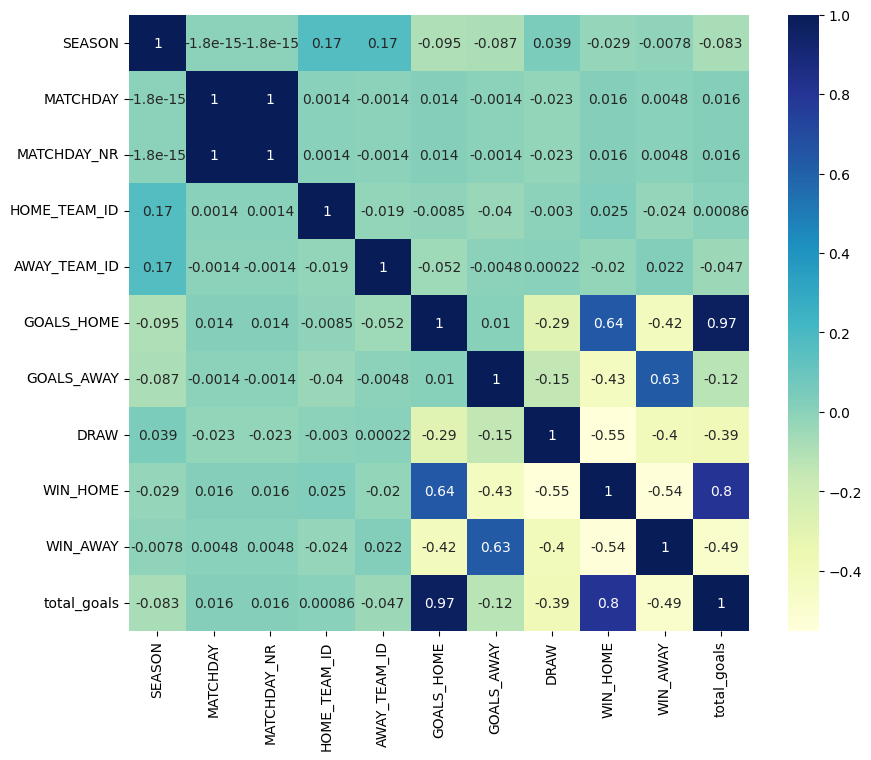

In [140]:
plt.figure(figsize=(10, 8))  # Set the size of the figure

corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='YlGnBu')

In [68]:
# for col in cleaned_df.columns:
#     print("df.columns", col)
#     print(df[col].value_counts())

In [163]:
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor

X = cleaned_df.drop("GOALS_HOME", axis=1)
Y = cleaned_df["GOALS_HOME"]
rows = []

columns = ['Alg name', 'Train', 'Test']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=0)

model_l = LinearRegression()


In [169]:
y_pred = model_l.predict(X_test)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# # Plot the training data and the fitted line
# cm = confusion_matrix(Y_test, y_pred)
# cm = confusion_matrix(Y_test, y_pred)
# conf = ConfusionMatrixDisplay(cm)
# conf.plot()
# plt.show()

from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [165]:
model_l.fit(X_train, Y_train)
print("\n Linear Regression")

mylist = ['LinearRegression', model_l.score(X_train,Y_train), model_l.score(X_test, Y_test)]

rows.append(mylist)

linear_data = pd.DataFrame(rows, columns=columns)
linear_data


 Linear Regression


,Alg name,Train,Test
0,LinearRegression,1.0,1.0


In [154]:
# Make predictions on the test set
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

classifiers = [
    ('Logistic Regression', LogisticRegression(multi_class='ovr')),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42))
]

for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_proba = classifier.predict_proba(X_test)
    auc = roc_auc_score(np.eye(3)[y_test], y_proba, average='weighted')
    print(f"{name} - Weighted AUC:", auc)

Logistic Regression - Weighted AUC: 0.9840020576131688
Random Forest - Weighted AUC: 0.9954475308641975


In [142]:

X = cleaned_df.drop("GOALS_HOME", axis=1)
Y = cleaned_df["GOALS_HOME"]
rows = []

columns = ['Alg name', 'Train', 'Test']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=0)

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, Y_train)

mylist = ['PolynomialFeatures', poly_clf.score(X_train2, Y_train), poly_clf.score(X_test2, Y_test)]

rows.append(mylist)

linear_data = pd.DataFrame(rows, columns=columns)
linear_data

,Alg name,Train,Test
0,PolynomialFeatures,1.0,0.999997


In [160]:
X = df.drop("GOALS_HOME", axis=1)
Y = df["GOALS_HOME"]

rows = []

columns = ['Alg name', 'Train', 'Test']

def knn_neigh(data, type="default"):
    X = data.drop("GOALS_HOME", axis=1)
    Y = data["GOALS_HOME"]

    for n in [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
        model_knn = KNeighborsRegressor(n_neighbors=n, p=2)
        model_knn.fit(X_train, Y_train)
        mylist = ['KNeighbors-n_estimators-'+str(n)+str(type), model_knn.score(X_train, Y_train), model_knn.score(X_test, Y_test)]
        rows.append(mylist)
        data = pd.DataFrame(rows, columns=columns)
    
    return data

print("KNeighbors regression data")    
print(linear_data)        
print("KNN with usual")
knn_table = knn_neigh(cleaned_df)
knn_table

KNeighbors regression data
           Alg name  Train  Test
0  LinearRegression    1.0   1.0
KNN with usual


,Alg name,Train,Test
0,KNeighbors-n_estimators-5default,0.447054,0.142029
1,KNeighbors-n_estimators-6default,0.402394,0.125605
2,KNeighbors-n_estimators-7default,0.364617,0.133441
3,KNeighbors-n_estimators-8default,0.346666,0.136307
4,KNeighbors-n_estimators-9default,0.323892,0.137054
5,KNeighbors-n_estimators-10default,0.307833,0.141391
6,KNeighbors-n_estimators-11default,0.288747,0.135709
7,KNeighbors-n_estimators-12default,0.272631,0.134852
8,KNeighbors-n_estimators-13default,0.261135,0.133745
9,KNeighbors-n_estimators-14default,0.249704,0.128039


In [144]:
from sklearn.svm import SVR
rows = []

columns = ['Alg name', 'Train', 'Test']

def svc(data,type=" default"):
    model_svr = SVR()
    X = data.drop("GOALS_HOME", axis=1)
    Y = data["GOALS_HOME"]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=0)

    for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
        model_svr = SVR(kernel=kernel)
        model_svr.fit(X_train, Y_train)
#         print("\n Kernel: ", kernel)
        mylist = ['svc-n_estimators-'+str(kernel)+str(type), model_svr.score(X_train, Y_train), model_svr.score(X_test, Y_test)]

        rows.append(mylist)
        
    return pd.DataFrame(rows, columns=columns)
    

svc(cleaned_df)

,Alg name,Train,Test
0,svc-n_estimators-linear default,0.995517,0.994975
1,svc-n_estimators-poly default,-0.039725,-0.044312
2,svc-n_estimators-rbf default,-0.043157,-0.047752
3,svc-n_estimators-sigmoid default,-0.090206,-0.101342


In [145]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

Y=cleaned_df["GOALS_HOME"]
# X=df.drop(["test"])
X = cleaned_df.drop(["GOALS_HOME"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

# Instantiate the model
# {}, default="squared_error"

criterions = ["squared_error", "friedman_mse", "absolute_error","poisson"]
for cr in criterions:
    model_dtr = DecisionTreeRegressor(max_depth=5, criterion=cr)
    model_dtr.fit(X_train, Y_train)
    # Fit the model with the train data
    print("DecisionTreeRegression, criterio", cr)
    print("Test::", model_dtr.score(X_test, Y_test))
    print("Train::", model_dtr.score(X_train, Y_train))

# Maxdepth: 5

DecisionTreeRegression, criterio squared_error
Test:: 0.9985910751695296
Train:: 0.9997628278930746
DecisionTreeRegression, criterio friedman_mse
Test:: 0.9985910751695296
Train:: 0.9997628278930746
DecisionTreeRegression, criterio absolute_error
Test:: 0.9562468071815585
Train:: 0.9591386341496985
DecisionTreeRegression, criterio poisson
Test:: 0.9287172245511003
Train:: 0.9337261896936724


In [159]:
from sklearn.ensemble import BaggingRegressor

Y=cleaned_df["GOALS_HOME"]
# X=df.drop(["test"])
X = cleaned_df.drop(["GOALS_HOME"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

model_dtr = RandomForestRegressor(max_depth=5, criterion='squared_error')
model_dtr.fit(X_train, Y_train)
# Fit the model with the train data
print("DecisionTreeRegression, criterio", cr)
print("Test::", model_dtr.score(X_test, Y_test))
print("Train::", model_dtr.score(X_train, Y_train))

for n in [1,2,3,5,6,10,20,22,25,30,40,50, 100]:
    modle_lgr = RandomForestRegressor(n_estimators=n)
    modle_lgr.fit(X_train, Y_train)
    print("\n n_estimators ", n)
    print("Train:: ",  modle_lgr.score(X_train,Y_train))
    print("Test:: ", modle_lgr.score(X_test, Y_test))

DecisionTreeRegression, criterio poisson
Test:: 0.9987432278959424
Train:: 0.9998116048908497

 n_estimators  1
Train::  1.0
Test::  0.9996353900598464

 n_estimators  2
Train::  0.9999618830542442
Test::  0.9990884751496159

 n_estimators  3
Train::  1.0
Test::  0.9996353900598464

 n_estimators  5
Train::  0.9999512103094325
Test::  0.9992270269268742

 n_estimators  6
Train::  0.999957647838049
Test::  0.9990884751496159

 n_estimators  10
Train::  0.9999832285438675
Test::  0.9994385006921633

 n_estimators  20
Train::  0.9999672194266499
Test::  0.9993528173562273

 n_estimators  22
Train::  0.9999719635688242
Test::  0.9992609868774984

 n_estimators  25
Train::  0.9999431600104889
Test::  0.9991494379316095

 n_estimators  30
Train::  0.999966287679087
Test::  0.9992375601029231

 n_estimators  40
Train::  0.9999799886034781
Test::  0.9993655787041326

 n_estimators  50
Train::  0.9999496856316022
Test::  0.9991437500165431

 n_estimators  100
Train::  0.9999702382887539
Test:: 

In [146]:
from sklearn.ensemble import BaggingRegressor

model_dtr = DecisionTreeRegressor(max_depth=5, criterion='squared_error')
model_dtr.fit(X_train, Y_train)
# Fit the model with the train data
print("DecisionTreeRegression, criterio", cr)
print("Test::", model_dtr.score(X_test, Y_test))
print("Train::", model_dtr.score(X_train, Y_train))

for n in [1,2,3,5,6,10,20,22,25,30,40,50, 100]:
    modle_lgr = BaggingRegressor(n_estimators=n, estimator=model_dtr)
    modle_lgr.fit(X_train, Y_train)
    print("\n n_estimators ", n)
    print("Train:: ",  modle_lgr.score(X_train,Y_train))
    print("Test:: ", modle_lgr.score(X_test, Y_test))

DecisionTreeRegression, criterio poisson
Test:: 0.9985910751695296
Train:: 0.9997628278930746

 n_estimators  1
Train::  1.0
Test::  0.9996353900598464

 n_estimators  2
Train::  0.9996660955551785
Test::  0.9983811318657176

 n_estimators  3
Train::  0.9997627326007101
Test::  0.9985781450207261

 n_estimators  5
Train::  0.9997688842522335
Test::  0.9985471869359926

 n_estimators  6
Train::  0.999761921415652
Test::  0.998550544303846

 n_estimators  10
Train::  0.9997504783097904
Test::  0.9985747024226652

 n_estimators  20
Train::  0.9997771582958085
Test::  0.9986076442989575

 n_estimators  22
Train::  0.9998259171233739
Test::  0.9988436704062178

 n_estimators  25
Train::  0.9998202012000242
Test::  0.9986799866676229

 n_estimators  30
Train::  0.9997841107845639
Test::  0.9986072445105725

 n_estimators  40
Train::  0.9998065907253559
Test::  0.9987577047745364

 n_estimators  50
Train::  0.9998307602306581
Test::  0.9987583995670218

 n_estimators  100
Train::  0.999807477